In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
import math

from utils import *

%matplotlib notebook

<IPython.core.display.Javascript object>


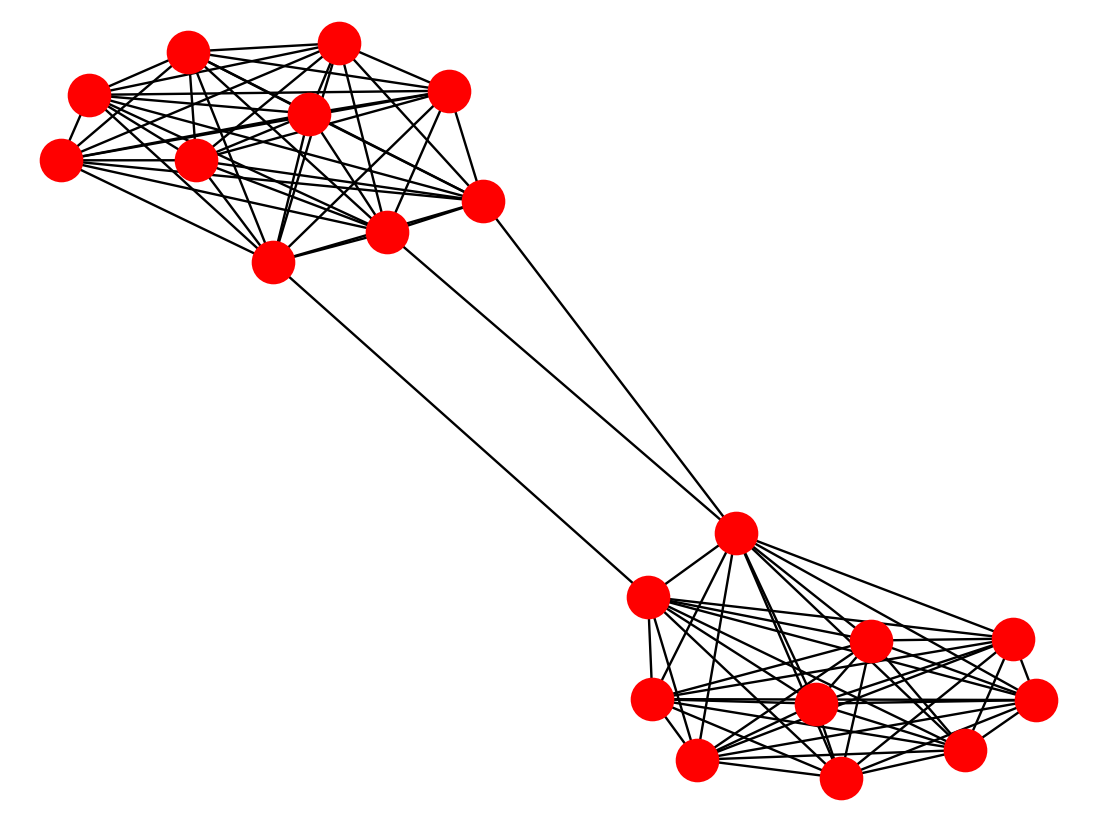

In [2]:
%matplotlib notebook
G = Modules_full(2, 10, 3)

pos = nx.spring_layout(G)

plt.figure()
nx.draw(G, pos = pos)

In [3]:
B, Bplus, v, w = compute_eig_projection(G)

<IPython.core.display.Javascript object>


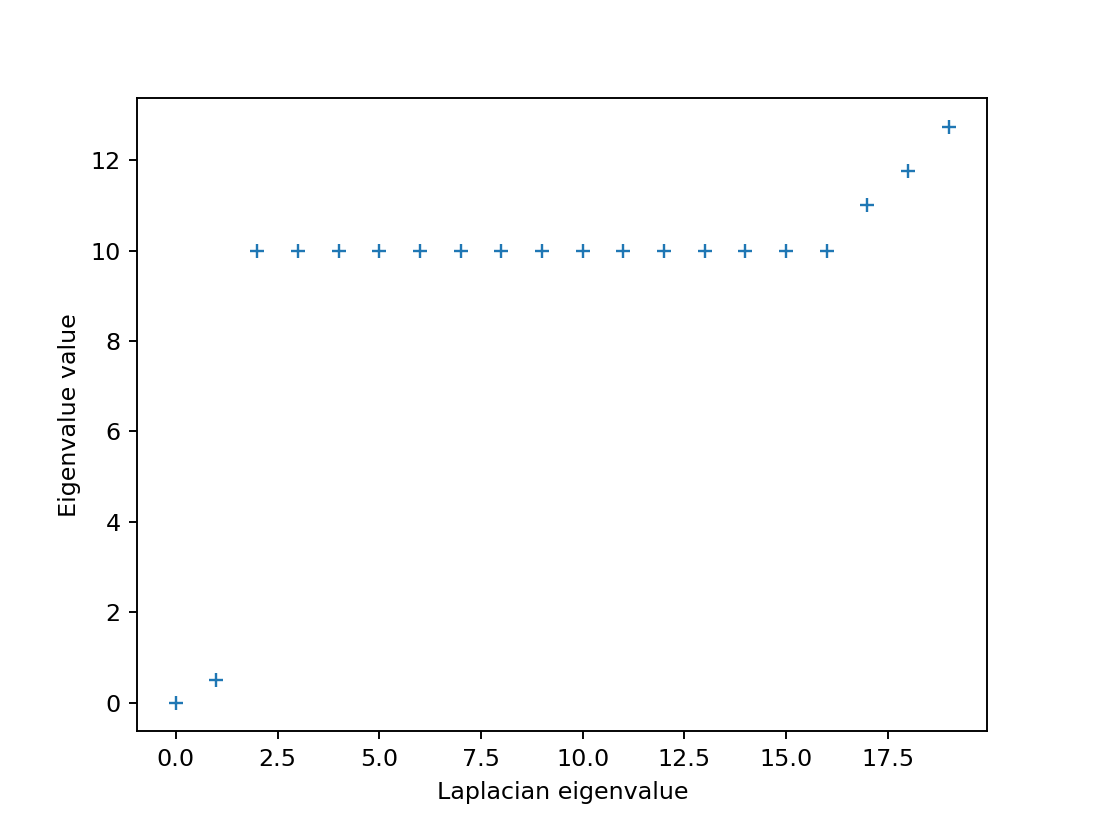

Text(0,0.5,'Eigenvalue value')

In [4]:

plt.figure()
plt.plot(w,'+')
plt.xlabel('Laplacian eigenvalue')
plt.ylabel('Eigenvalue value')

<IPython.core.display.Javascript object>


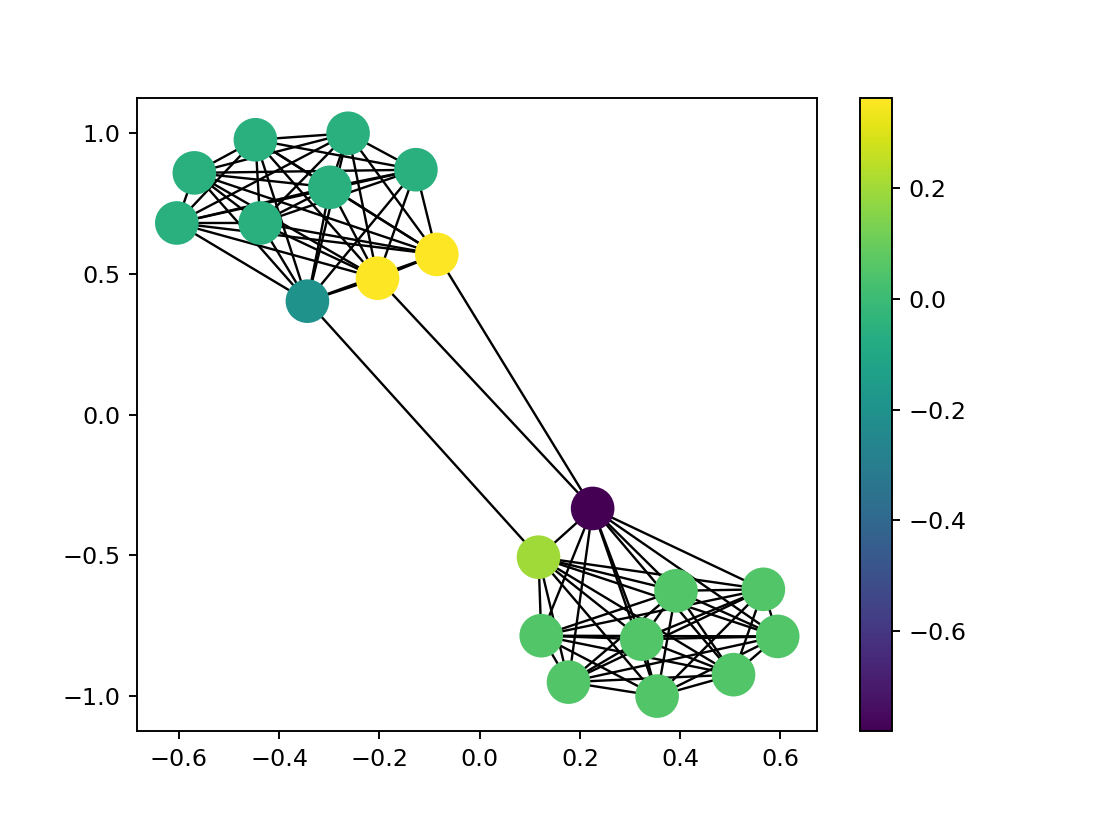

In [5]:
def plot_eigenvector(i):
    plt.figure()
    nodes = nx.draw_networkx_nodes(G, pos = pos, node_color = v[:,i])
    plt.colorbar(nodes)
    nx.draw_networkx_edges(G, pos = pos)

plot_eigenvector(-1)

<IPython.core.display.Javascript object>


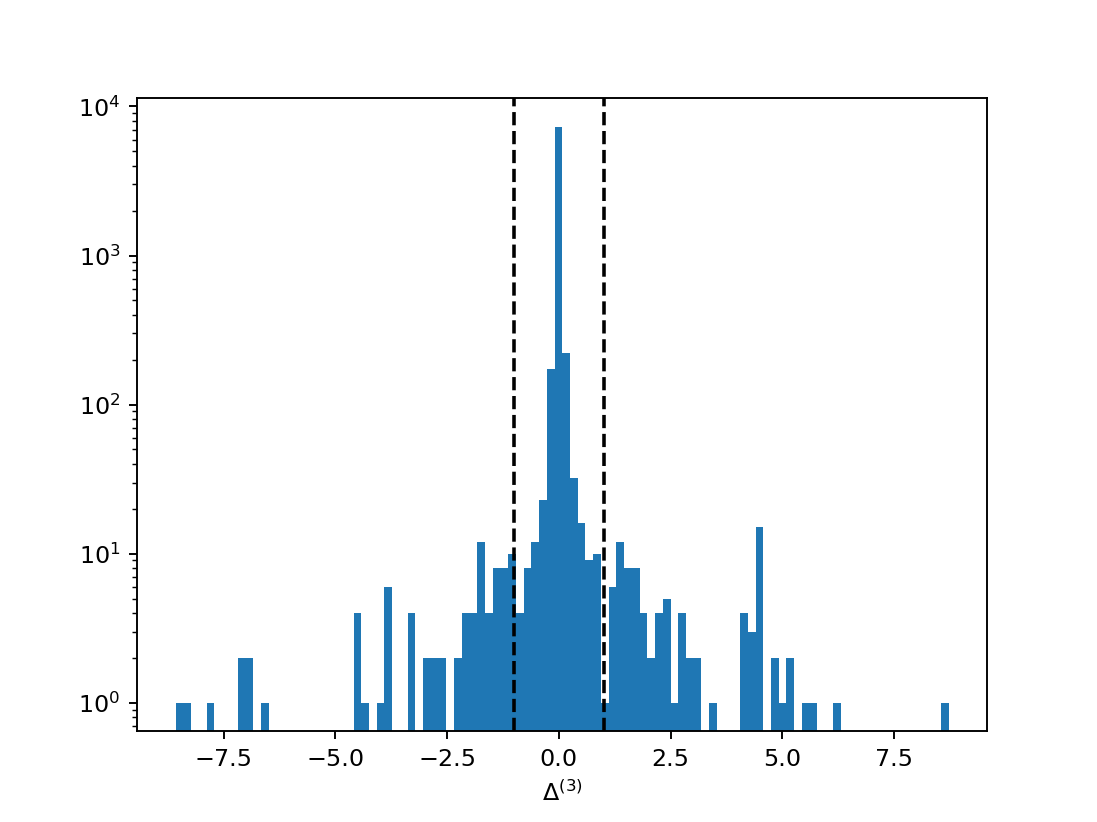

<IPython.core.display.Javascript object>


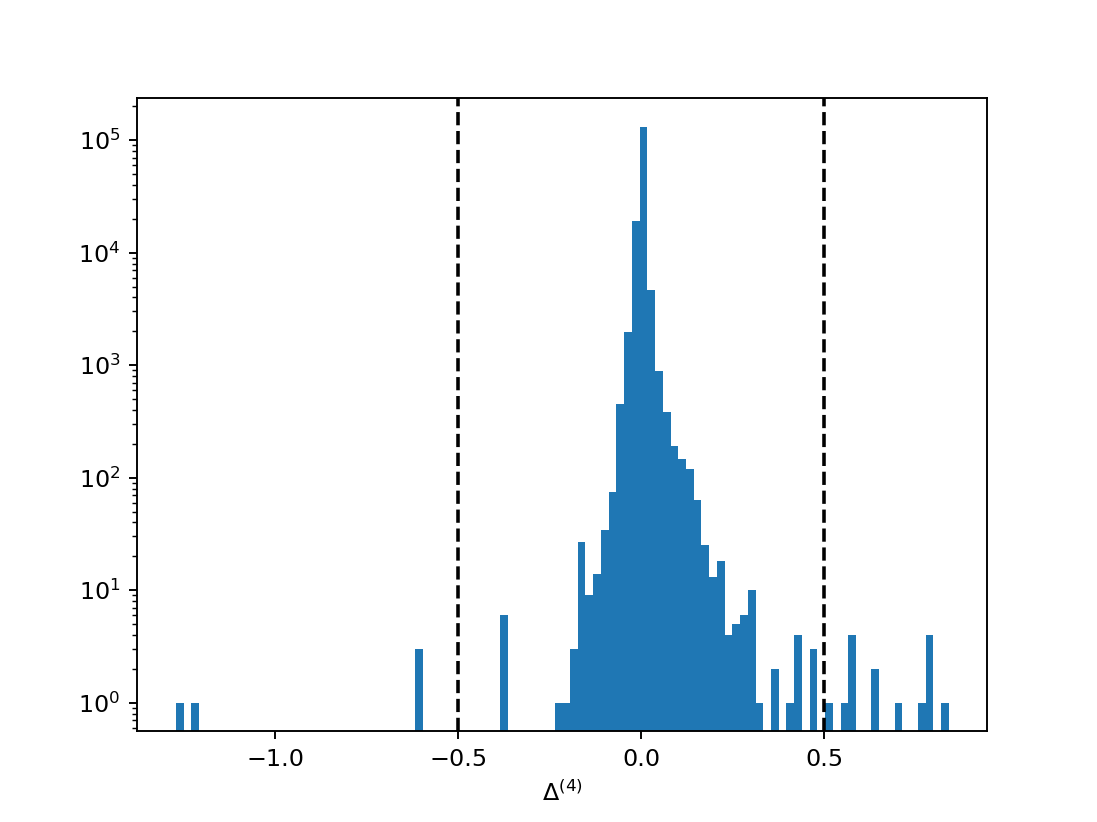

Text(0.5,0,'$\\Delta^{(4)}$')

In [6]:
Bv = np.array(B.dot(v)) #edges by modes
Bplusv = np.array(Bplus.dot(v)) #edges by modes

w_0 = w.copy()
w_0[0]=1

D3 = Delta_3(Bv, Bplusv)/w_0[:,np.newaxis,np.newaxis]

th_3 = 1.
th_4 = 0.5

plt.figure()
plt.hist(D3.flatten(),bins=100,log=True)
plt.axvline(-th_3,ls='--',c='k')
plt.axvline(th_3,ls='--',c='k')
plt.xlabel(r'$\Delta^{(3)}$')

D4 = Delta_4(Bv, Bplusv)/w_0[:,np.newaxis,np.newaxis,np.newaxis]

plt.figure()
plt.hist(D4.flatten(),bins=100,log=True)
plt.axvline(-th_4,ls='--',c='k')
plt.axvline(th_4,ls='--',c='k')
plt.xlabel(r'$\Delta^{(4)}$')


0


<IPython.core.display.Javascript object>


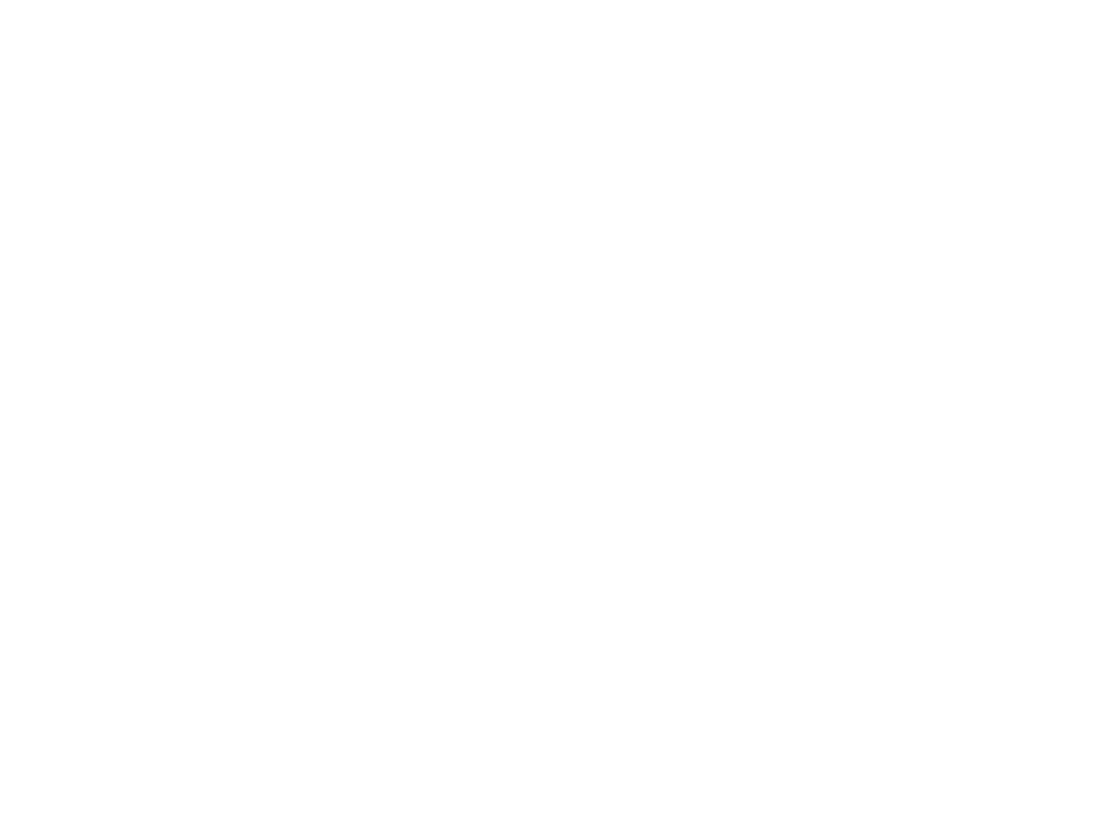

1


<IPython.core.display.Javascript object>


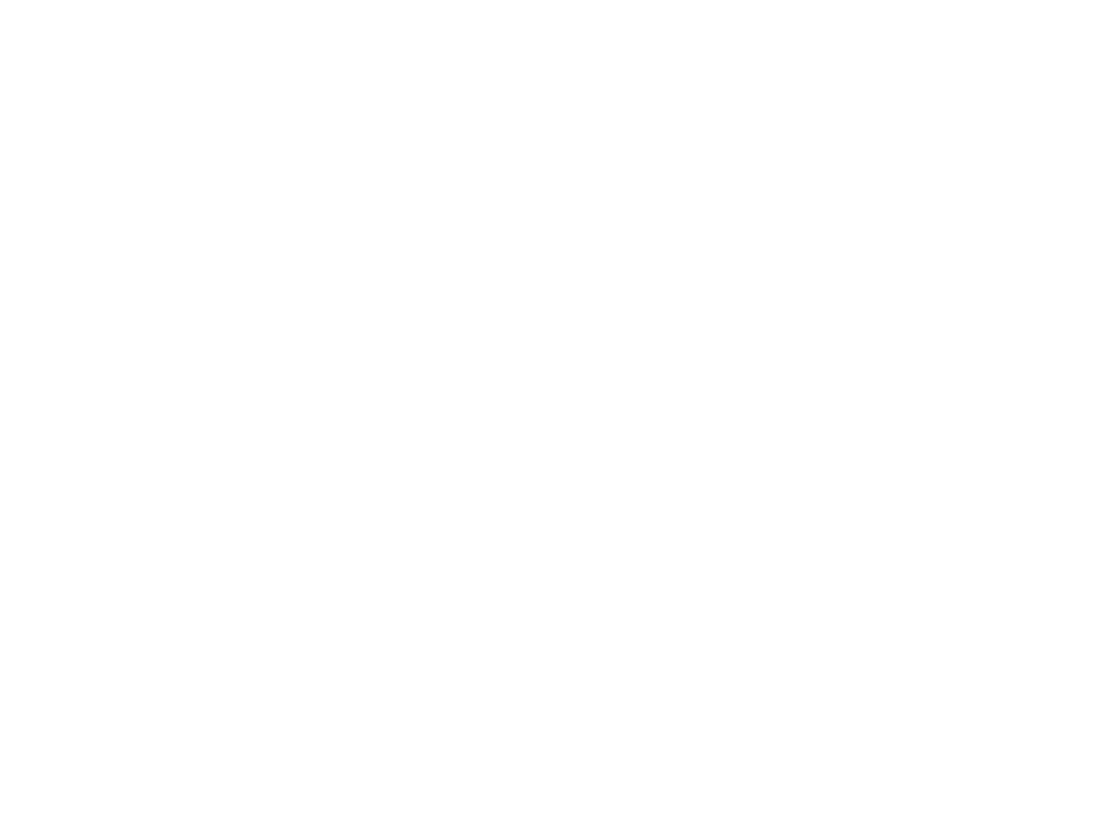

2


<IPython.core.display.Javascript object>


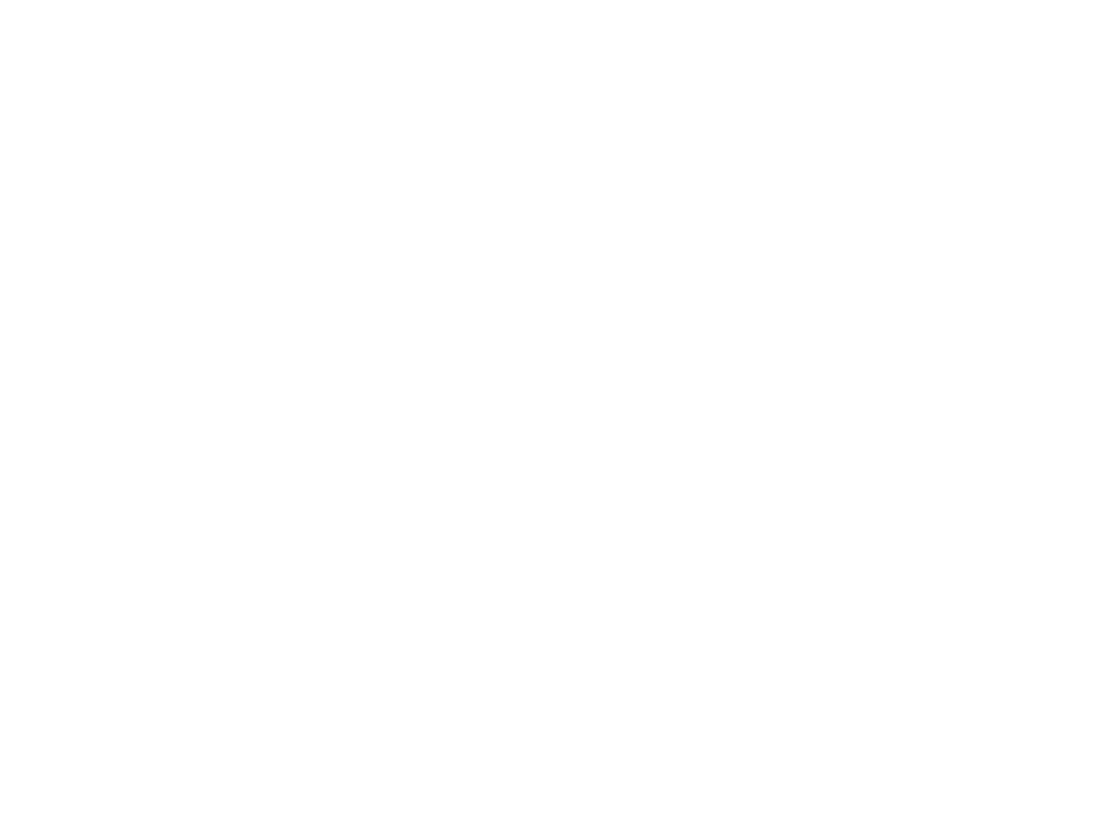

3


<IPython.core.display.Javascript object>


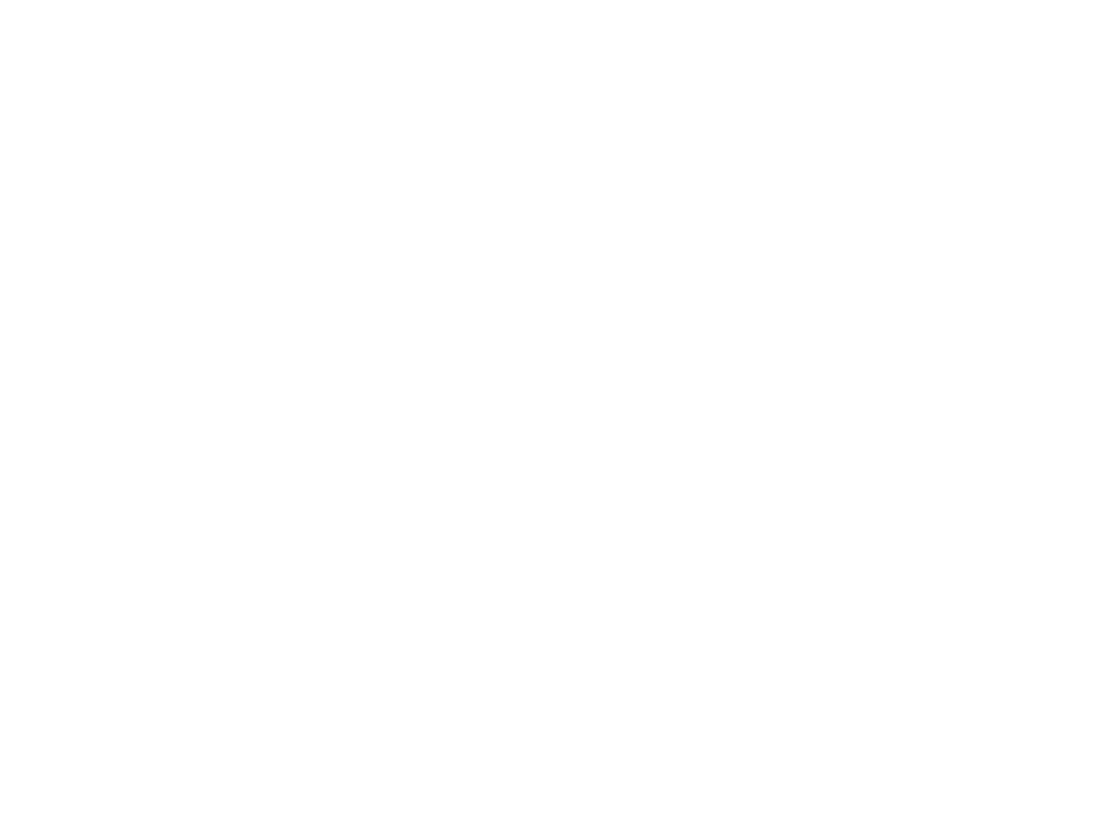

4


<IPython.core.display.Javascript object>


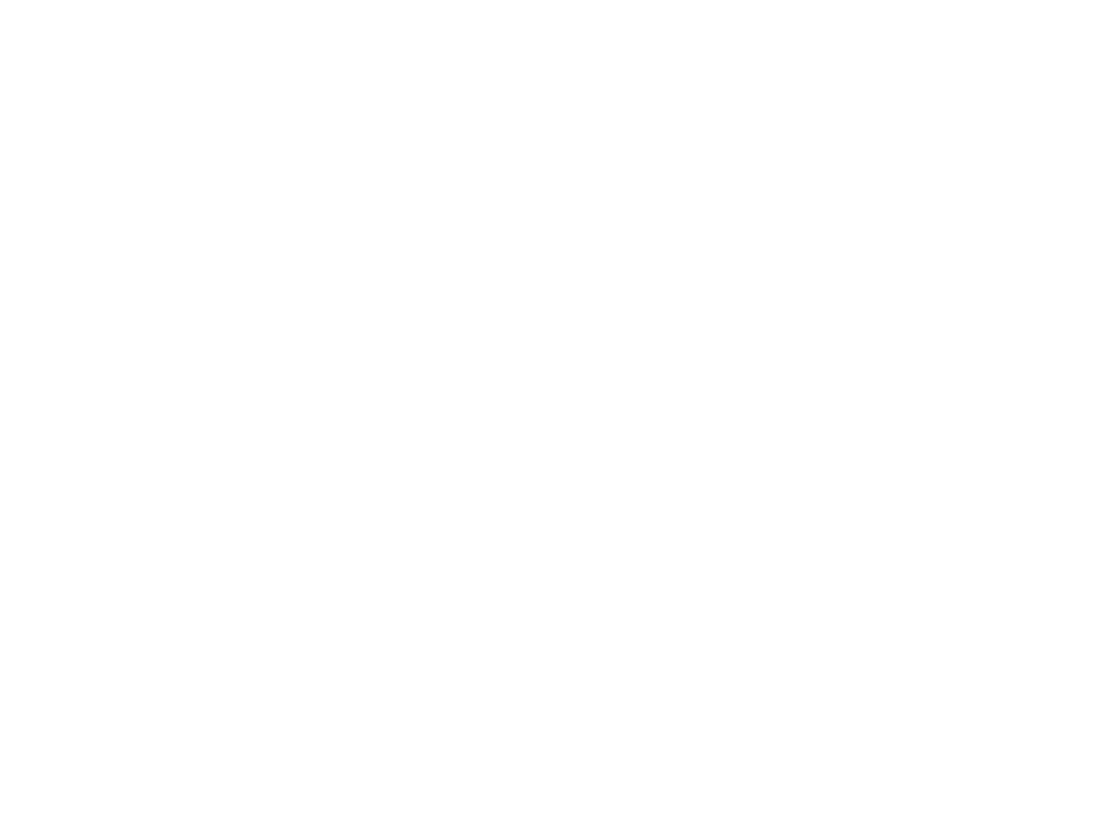

5


<IPython.core.display.Javascript object>


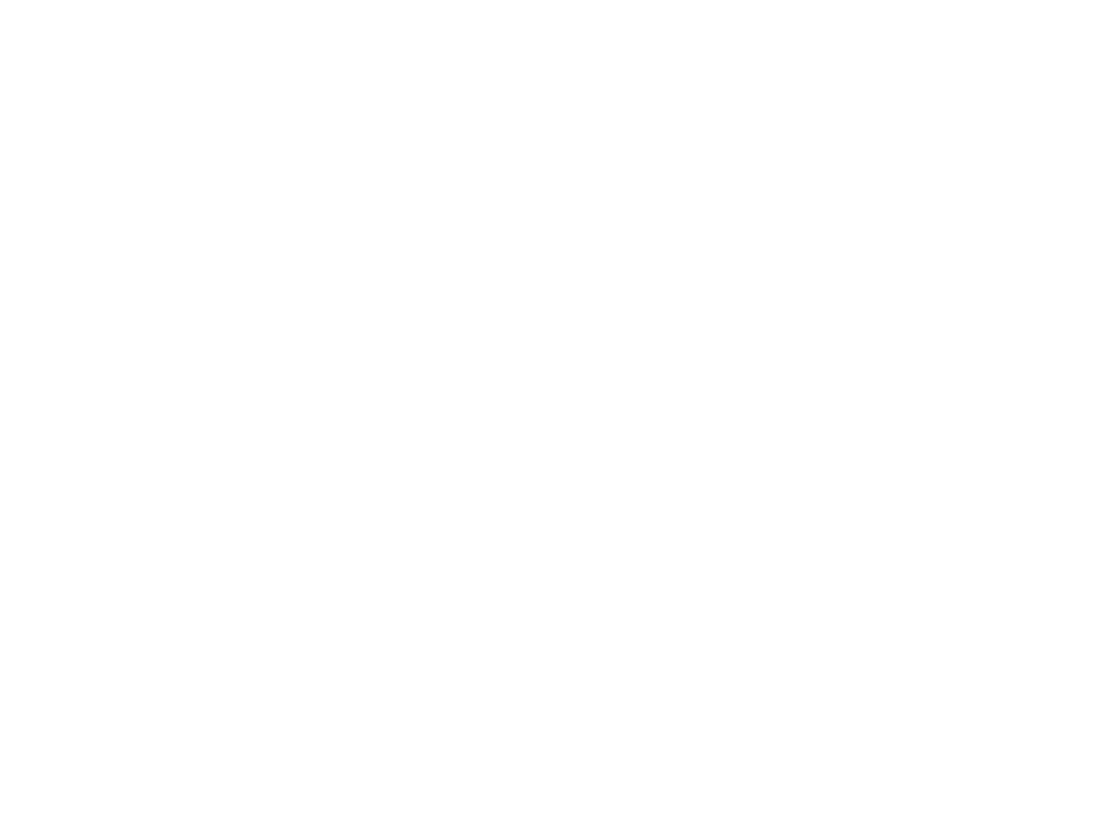

6


<IPython.core.display.Javascript object>


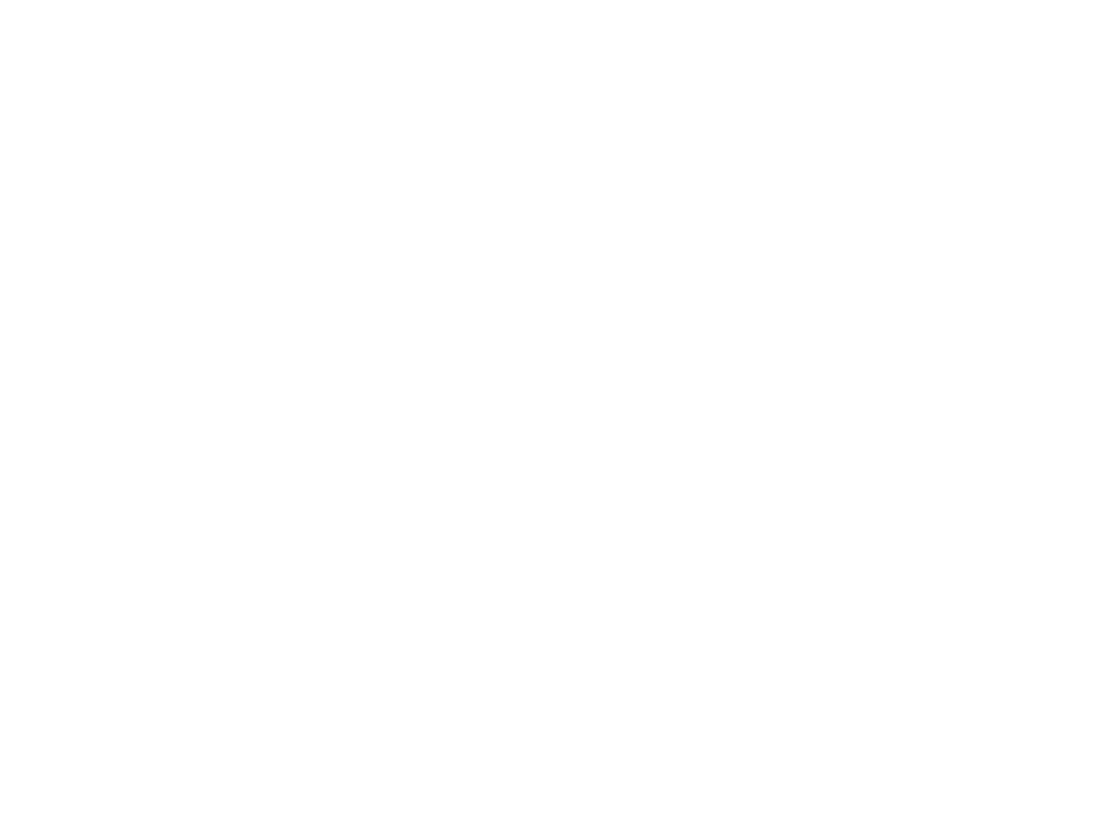

7


<IPython.core.display.Javascript object>


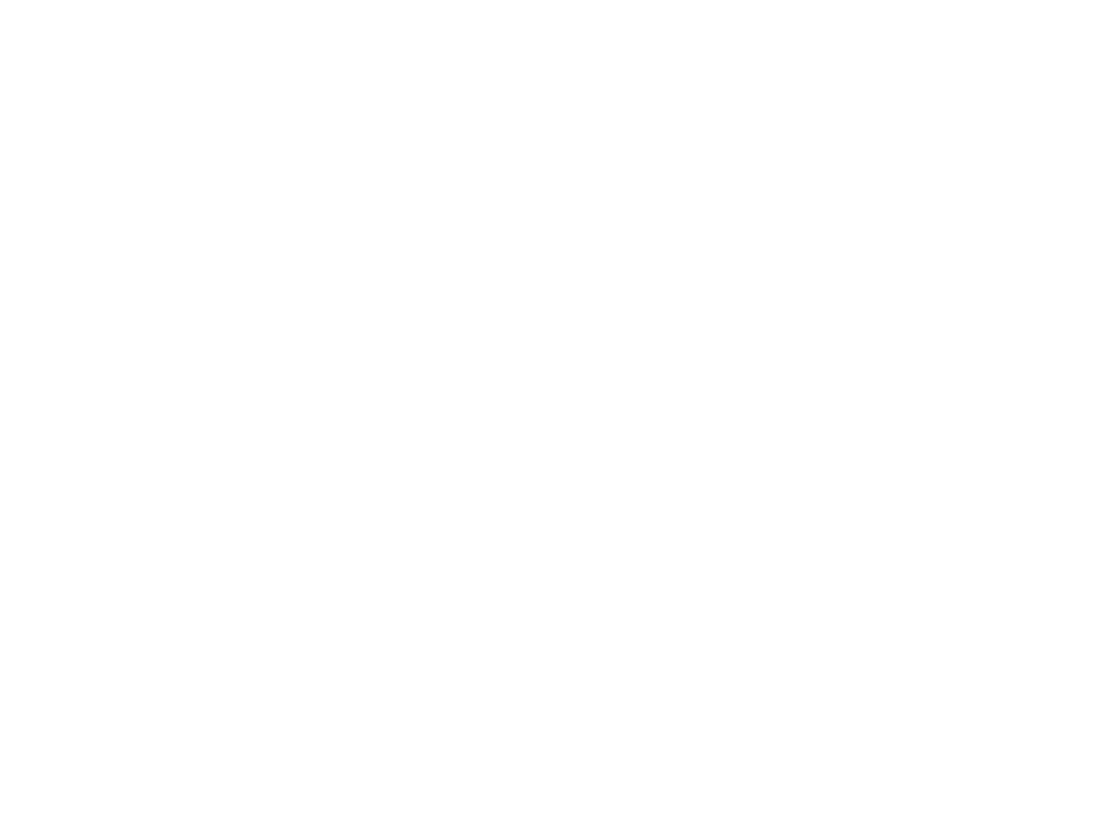

8


<IPython.core.display.Javascript object>


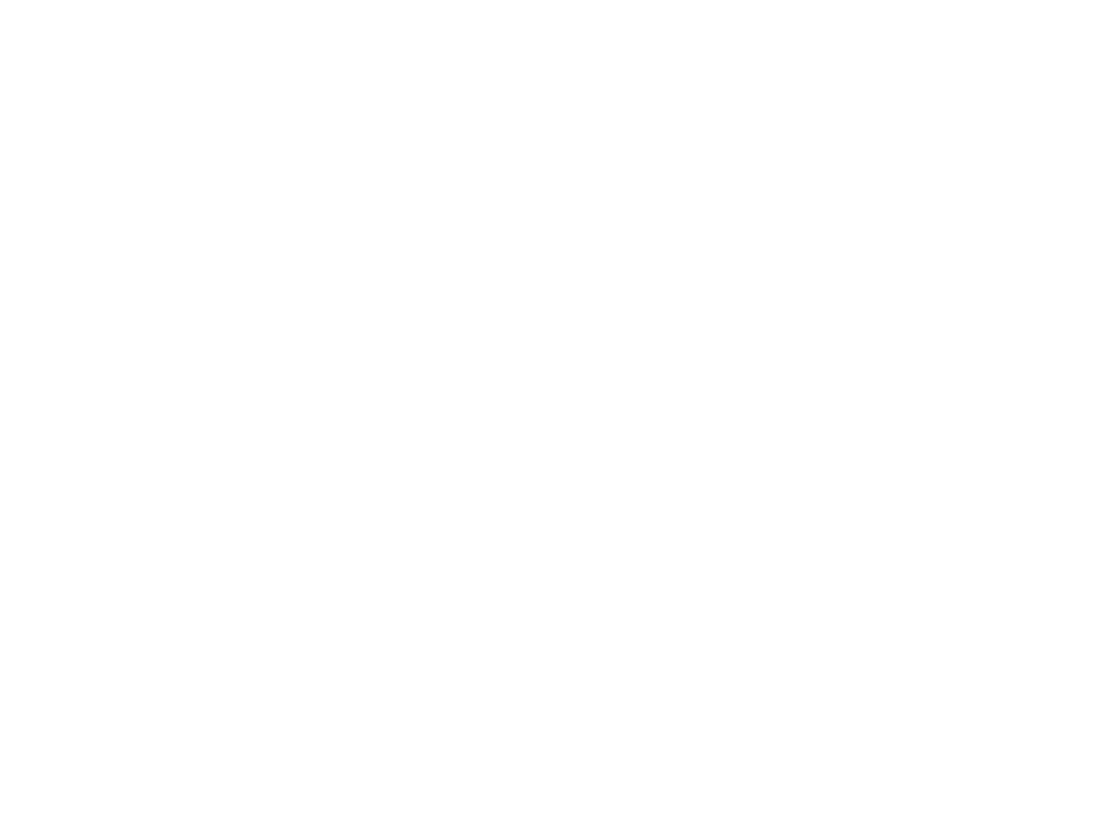

9


<IPython.core.display.Javascript object>


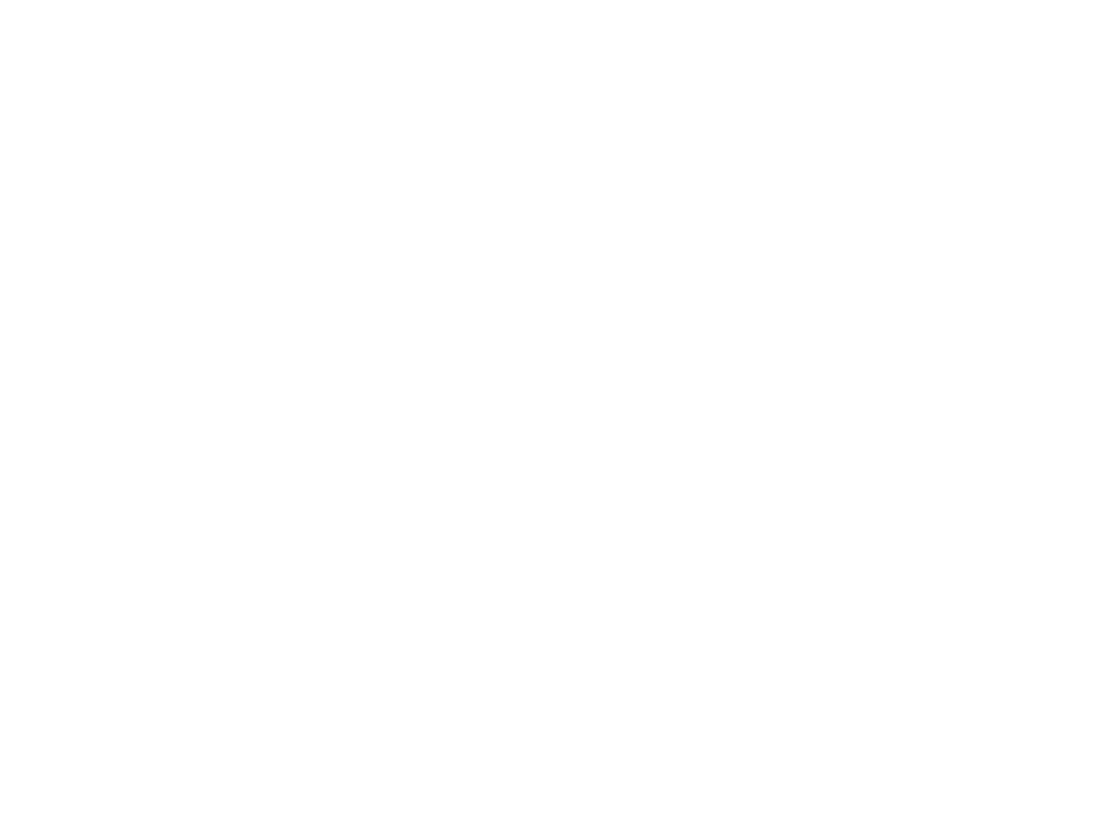

10


<IPython.core.display.Javascript object>


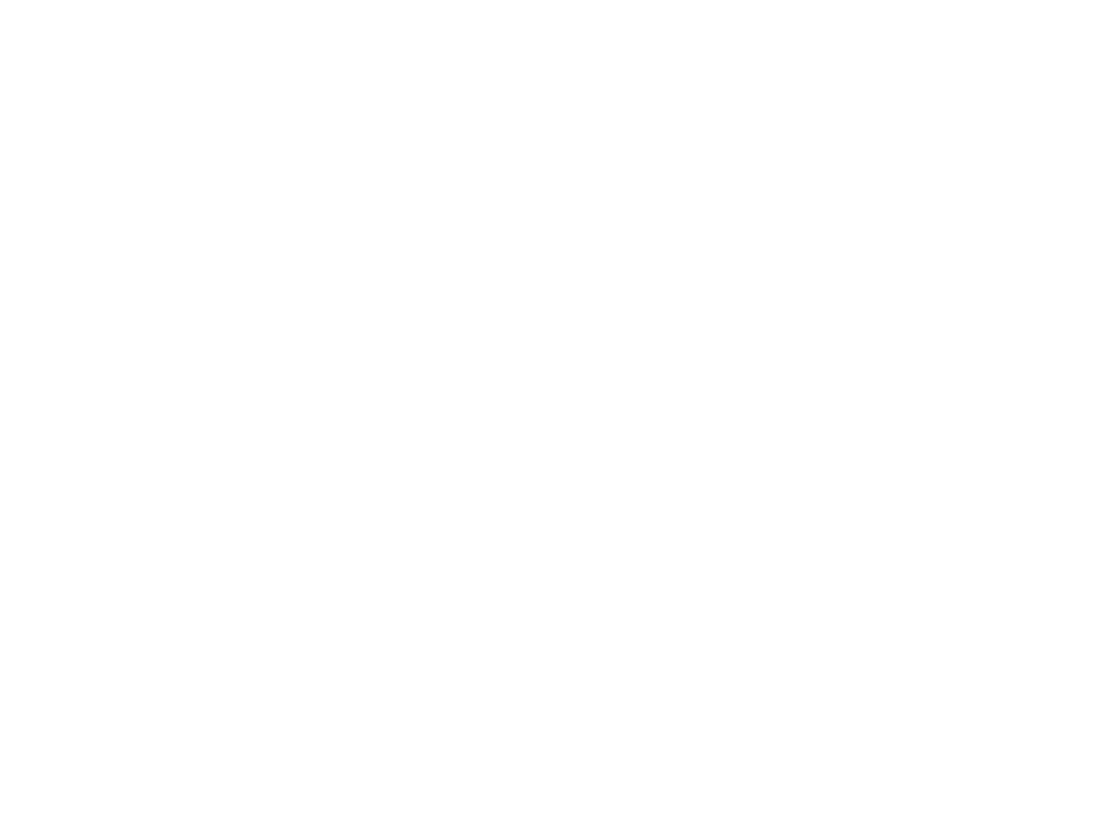

11


<IPython.core.display.Javascript object>


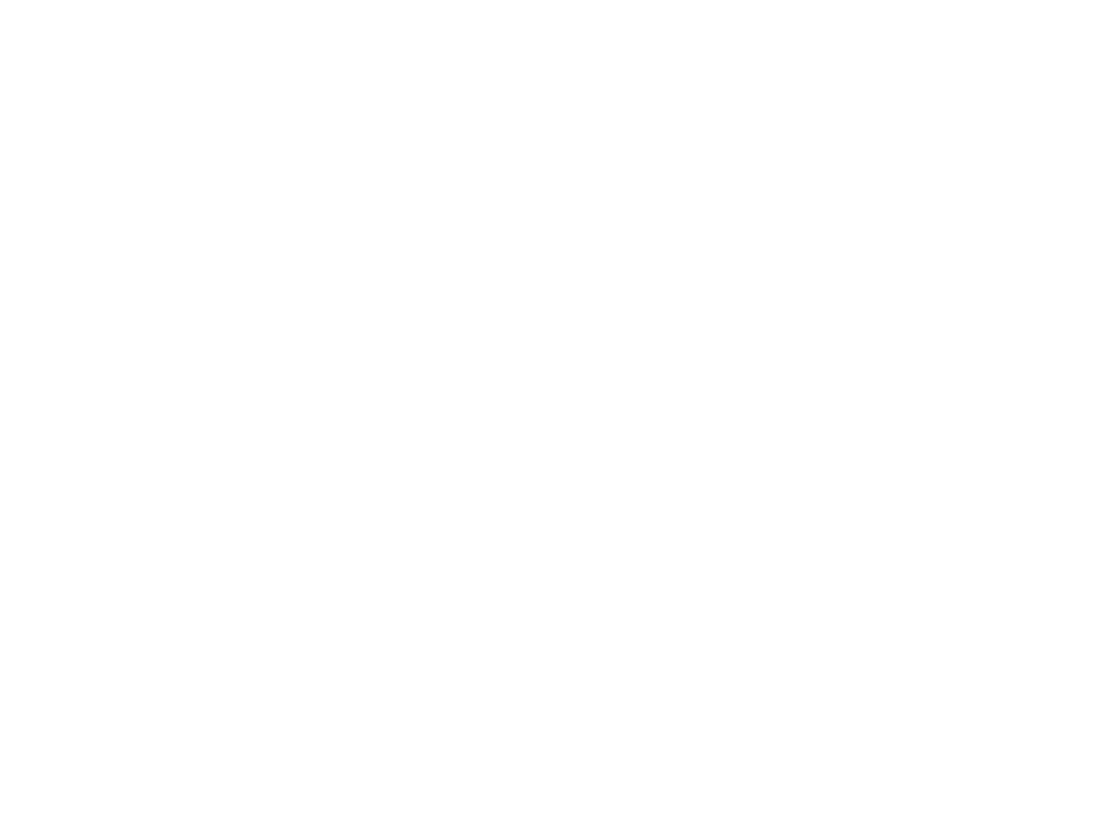

12


<IPython.core.display.Javascript object>


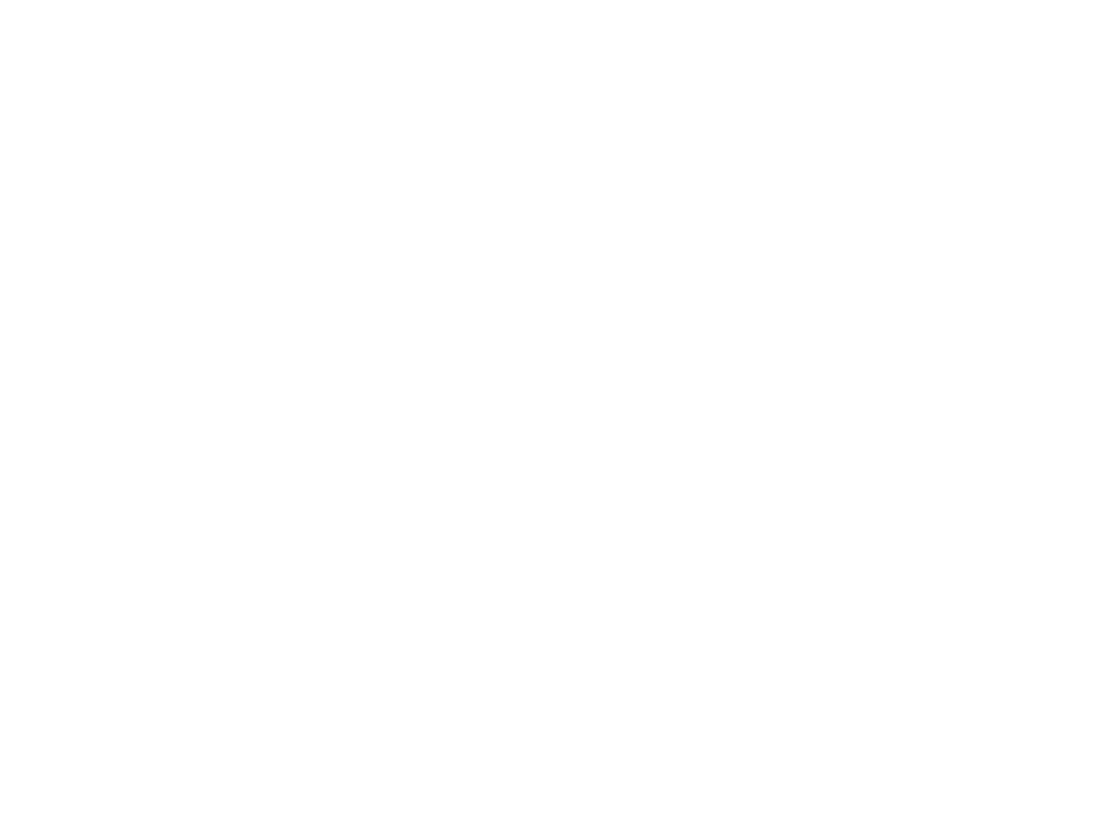

13


<IPython.core.display.Javascript object>


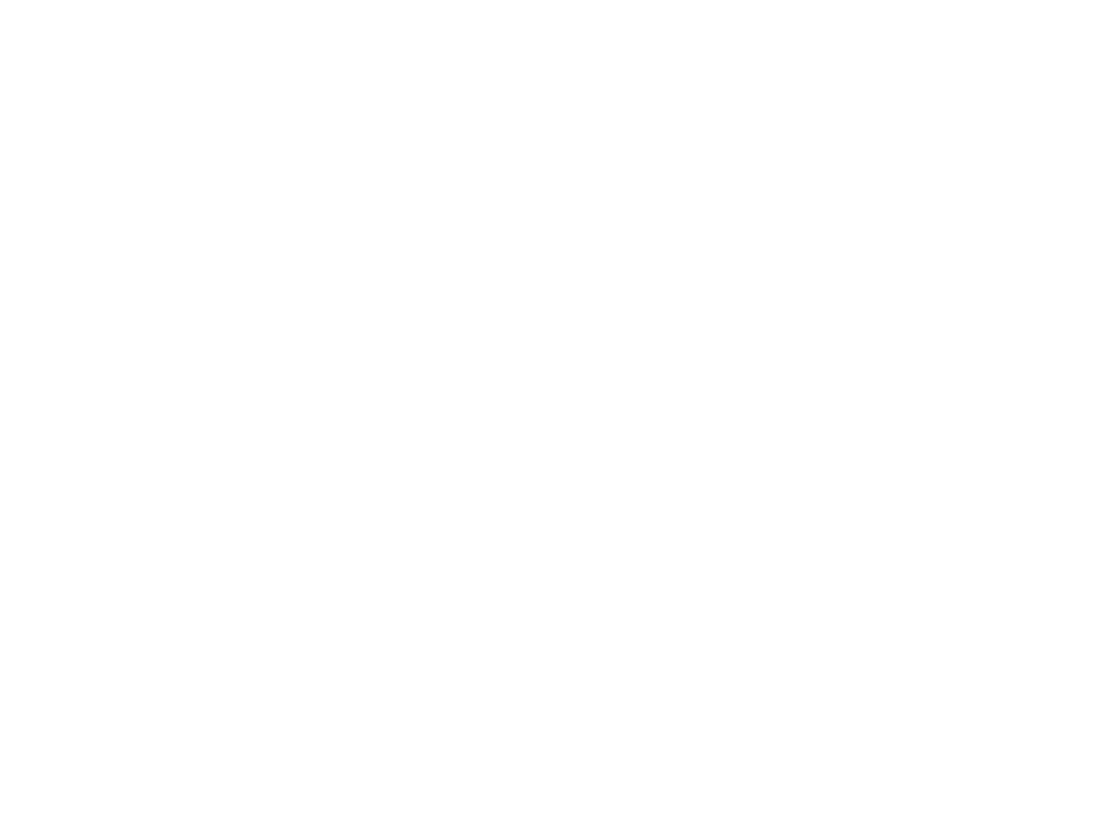

14


<IPython.core.display.Javascript object>


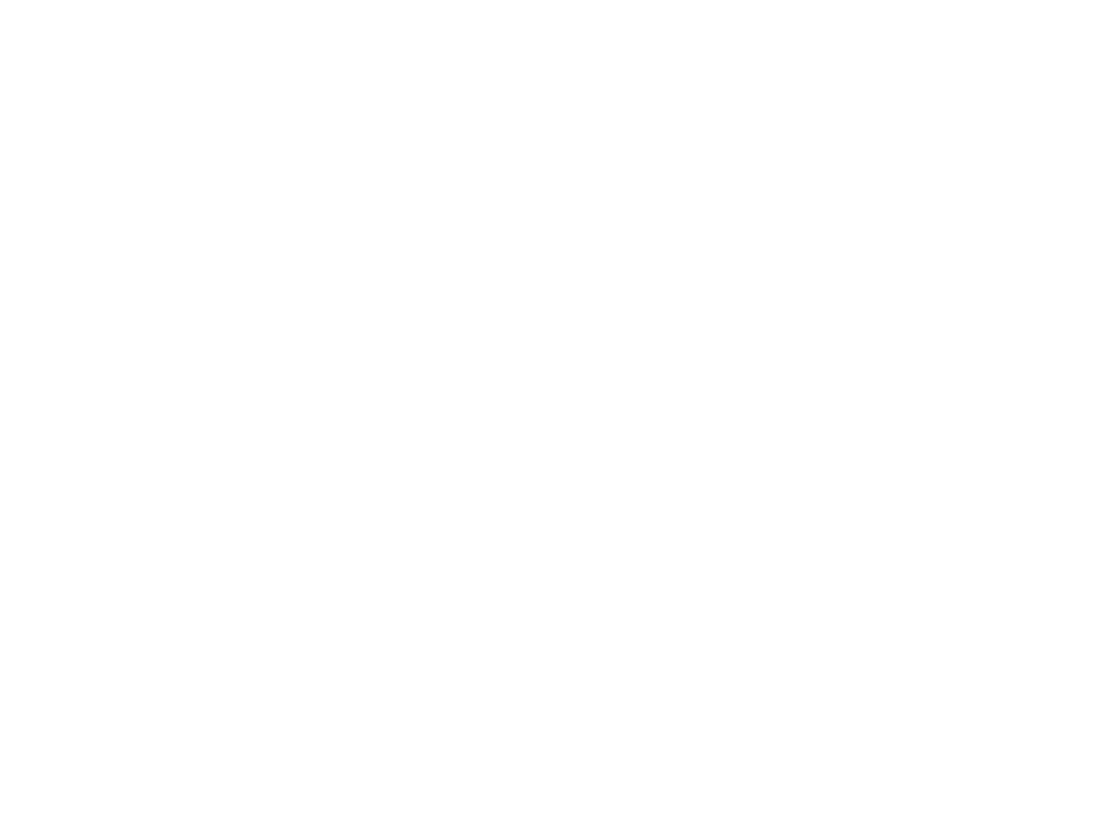

15


<IPython.core.display.Javascript object>


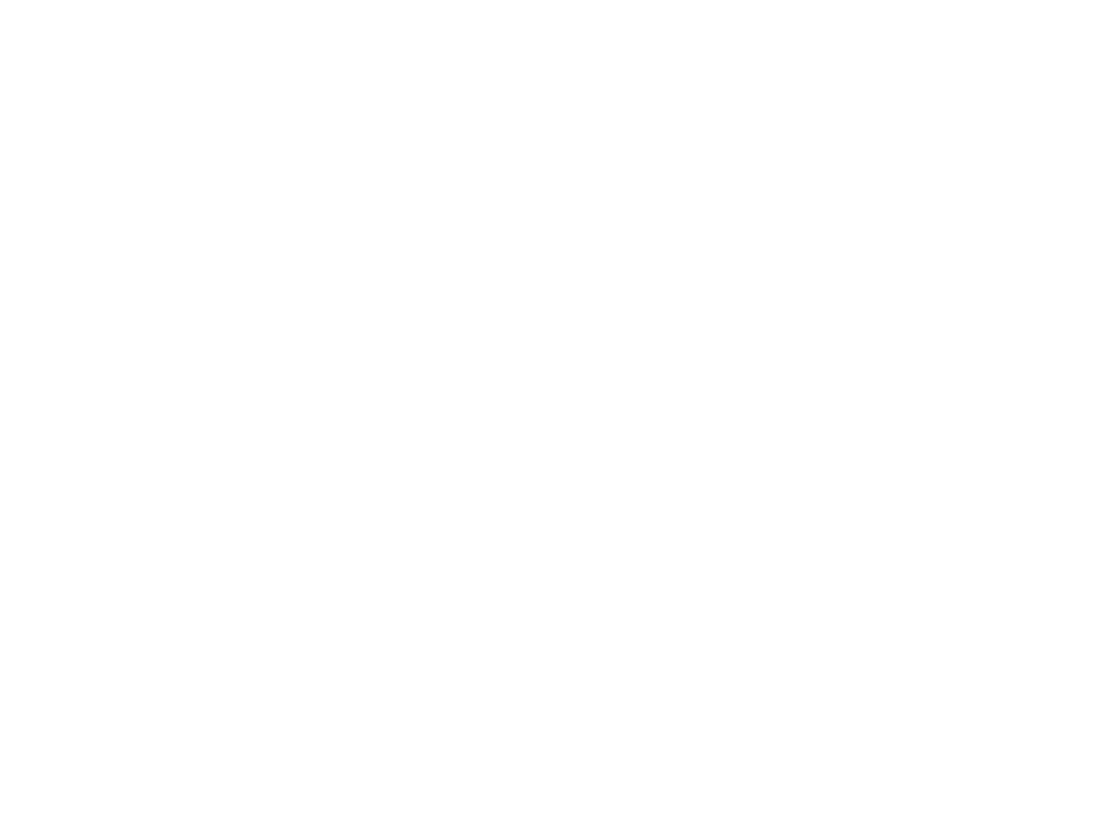

16


<IPython.core.display.Javascript object>


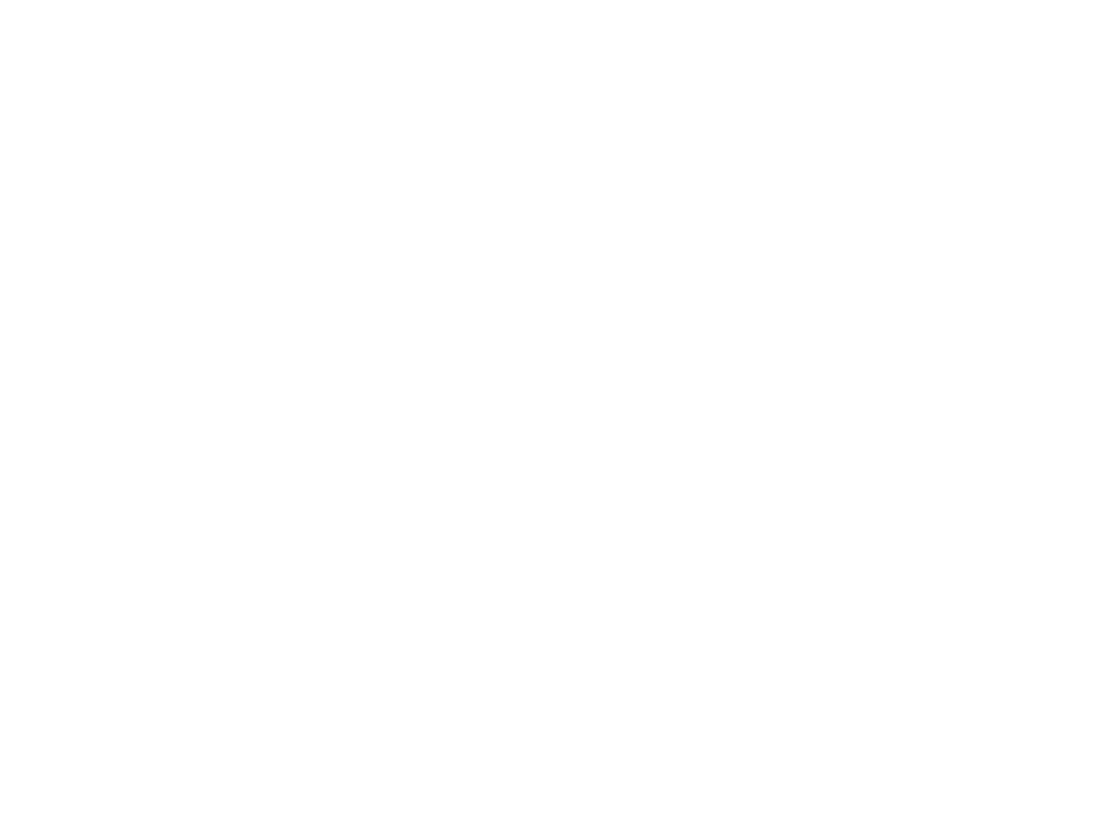

17


<IPython.core.display.Javascript object>


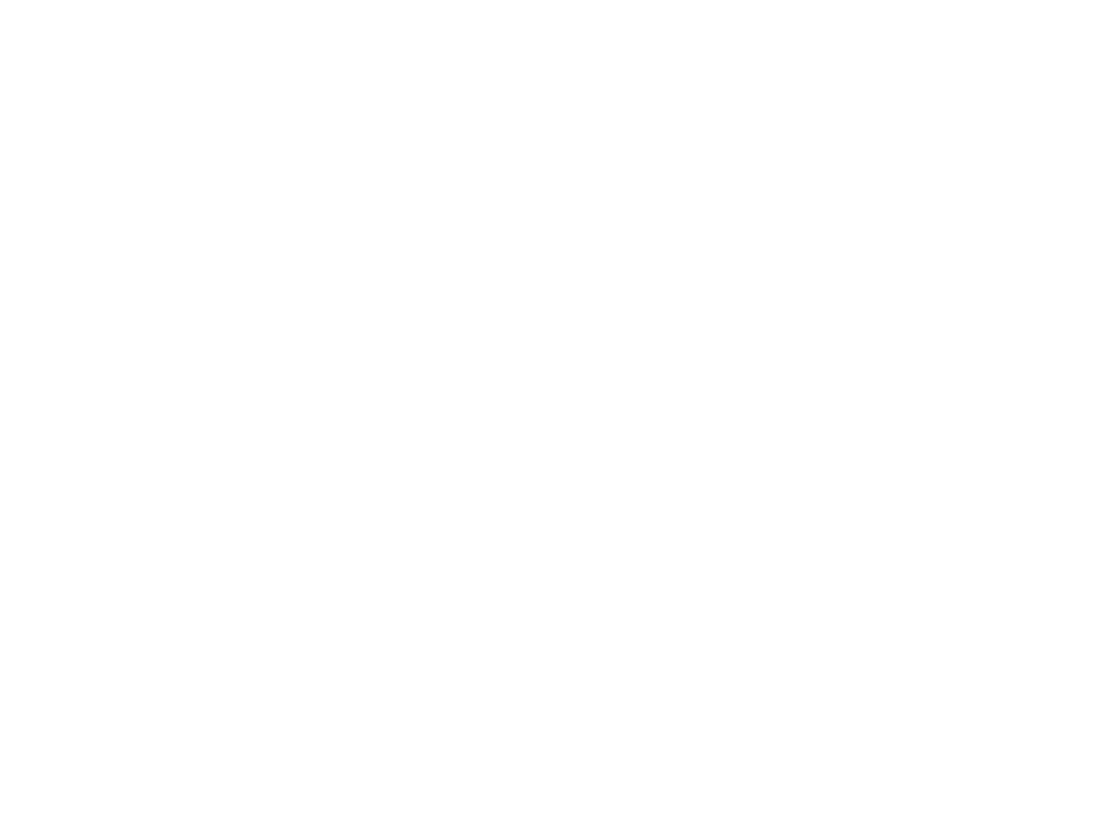

18


<IPython.core.display.Javascript object>


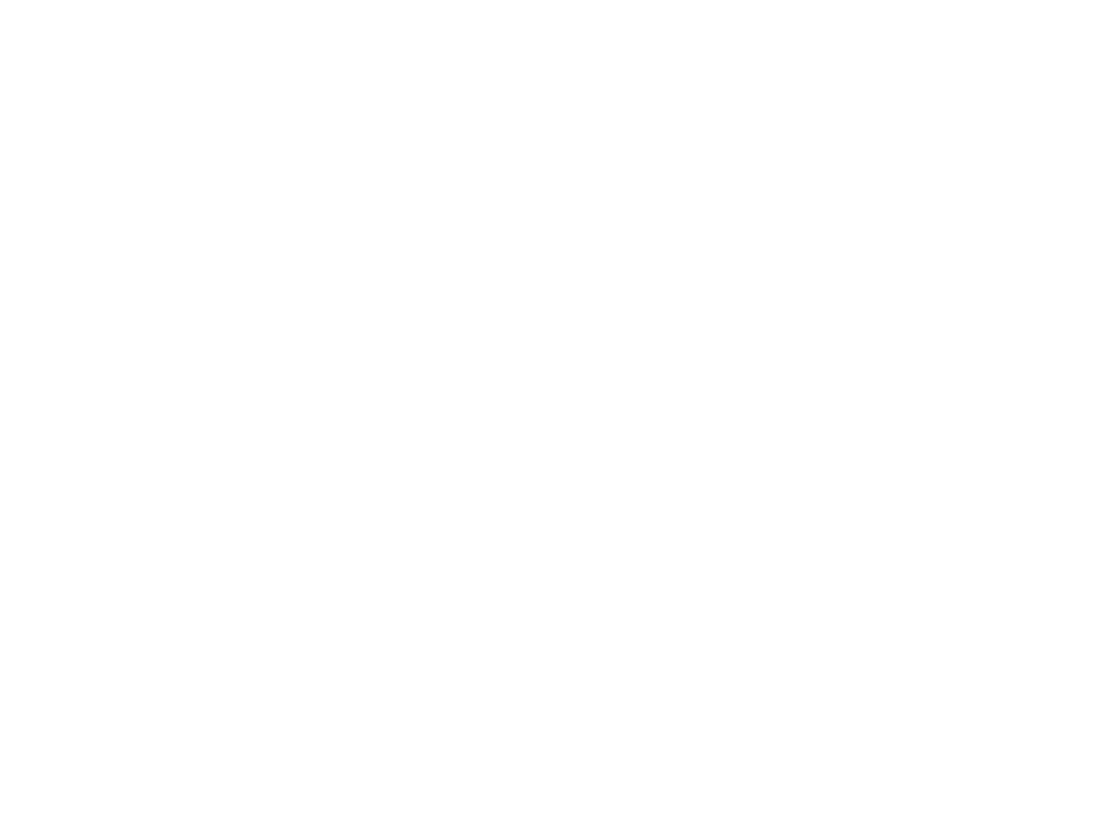

19


<IPython.core.display.Javascript object>


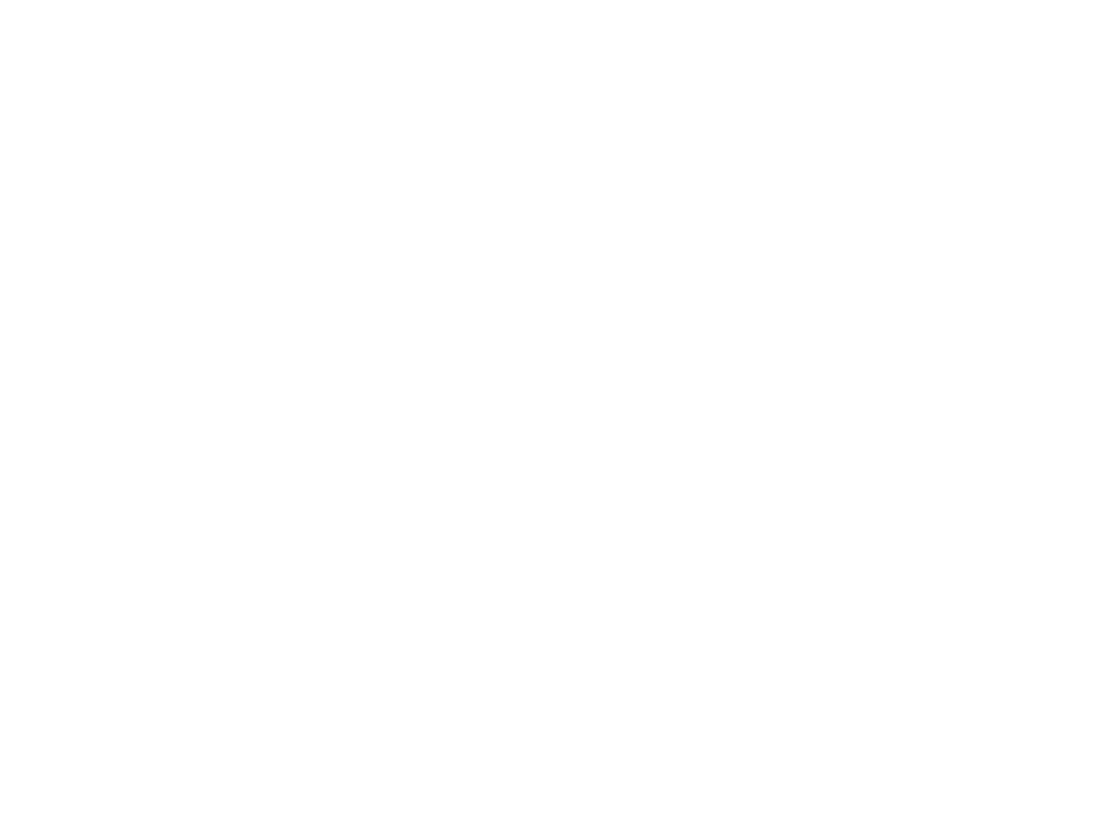

In [7]:
#plot the Delta_3 matrices, one for each i
D3[abs(D3) < th_3] = 0
for i in range(len(G)):
    print(i)
    plt.figure()
    plt.imshow(D3[i])#,vmin=-0.5,vmax=0.5)
    plt.colorbar()
    plt.savefig('images/D3_'+str(i)+'.png')
    plt.close()

0


<IPython.core.display.Javascript object>


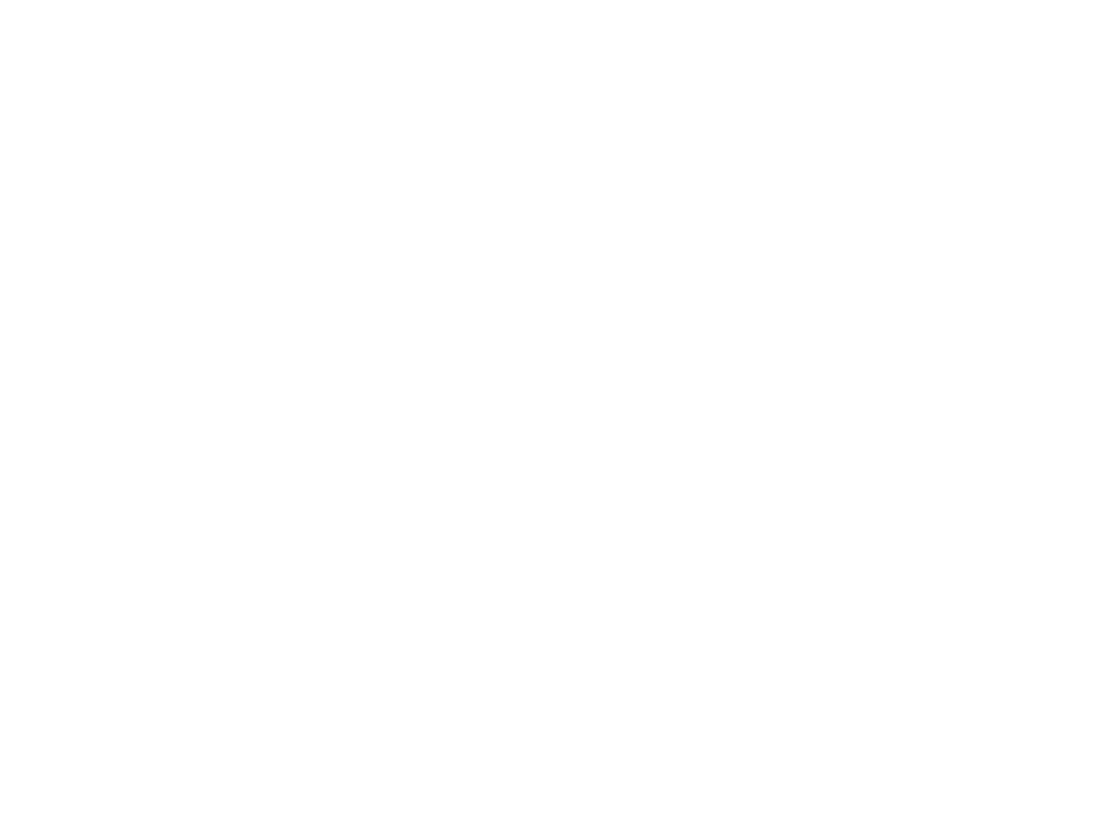

1


<IPython.core.display.Javascript object>


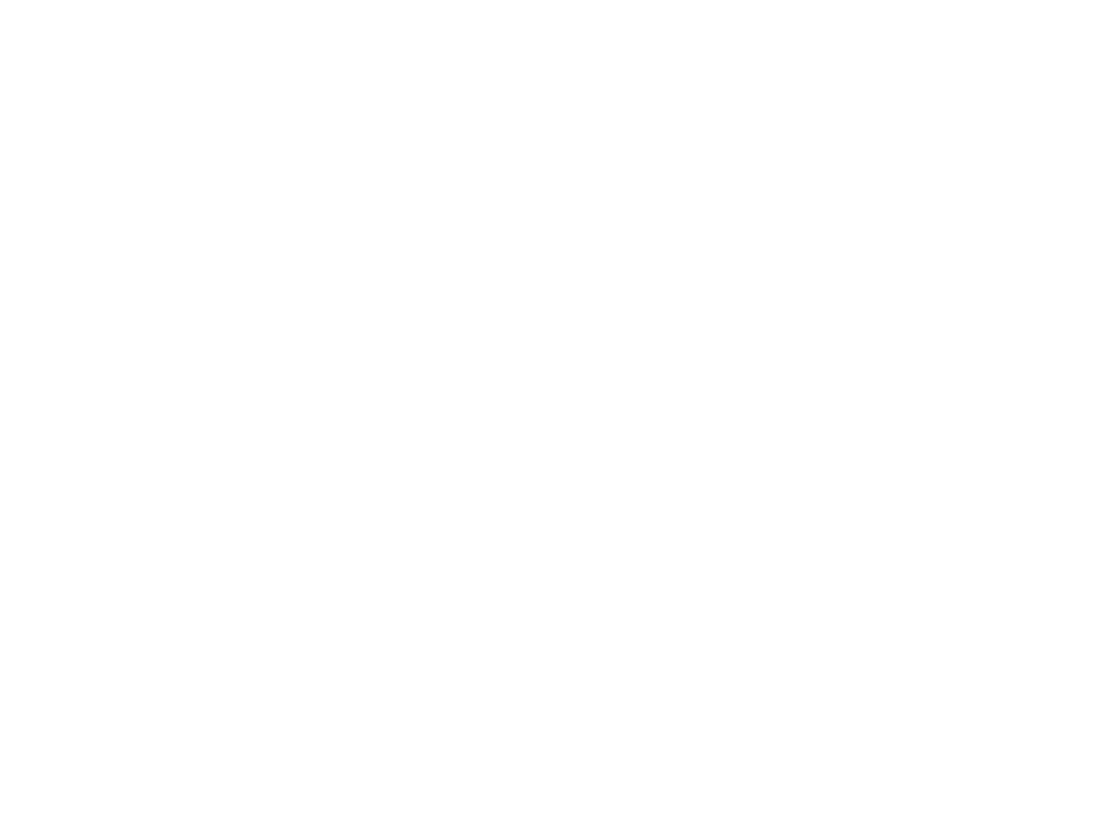

2


<IPython.core.display.Javascript object>


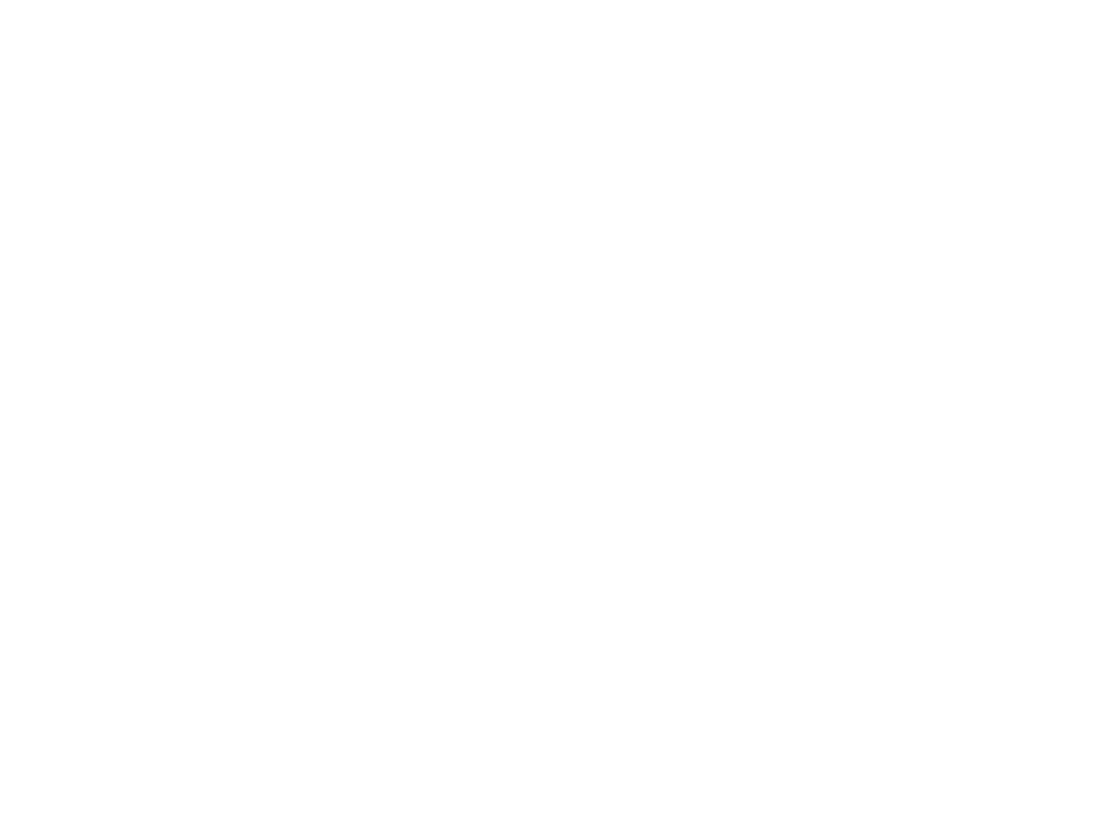

3


<IPython.core.display.Javascript object>


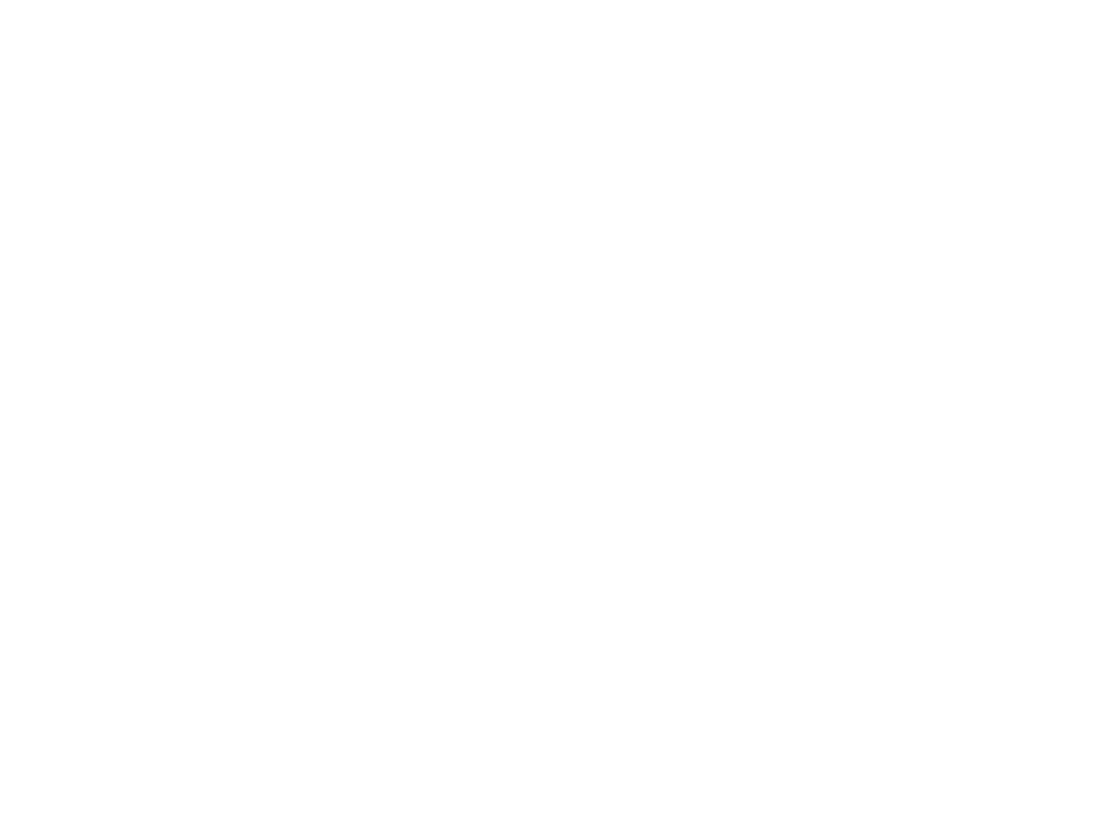

4


<IPython.core.display.Javascript object>


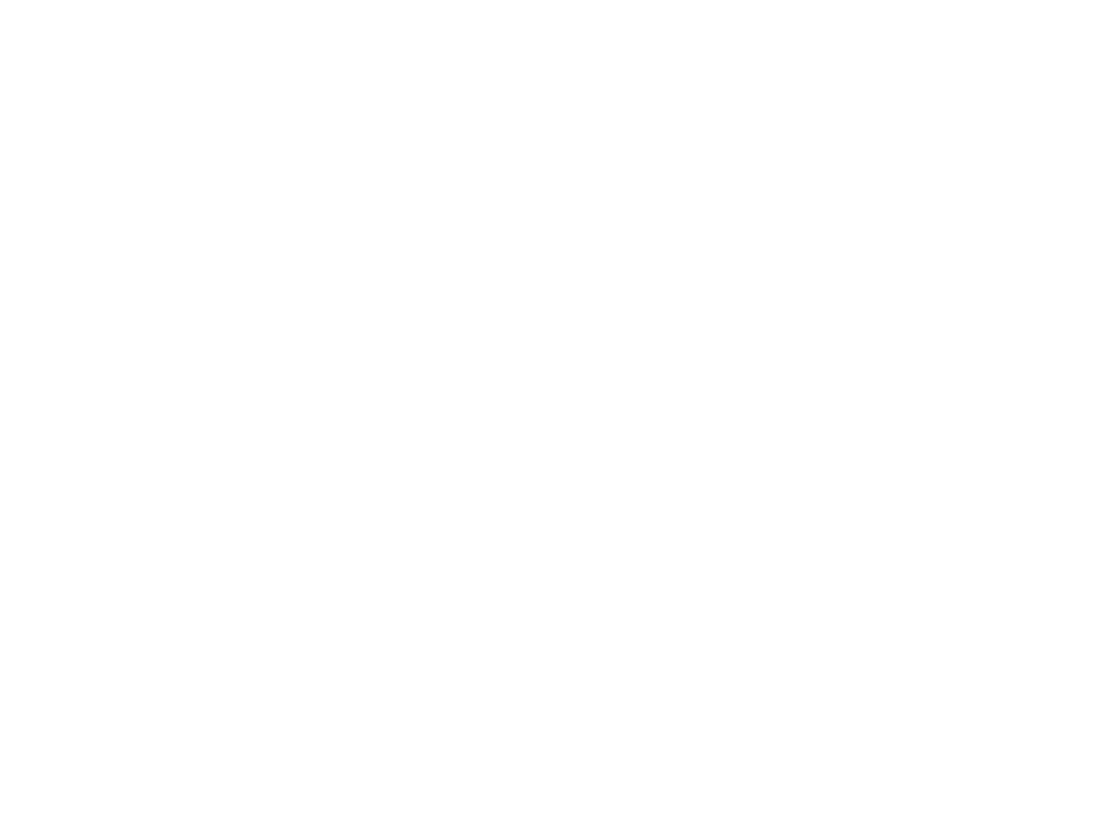

5


<IPython.core.display.Javascript object>


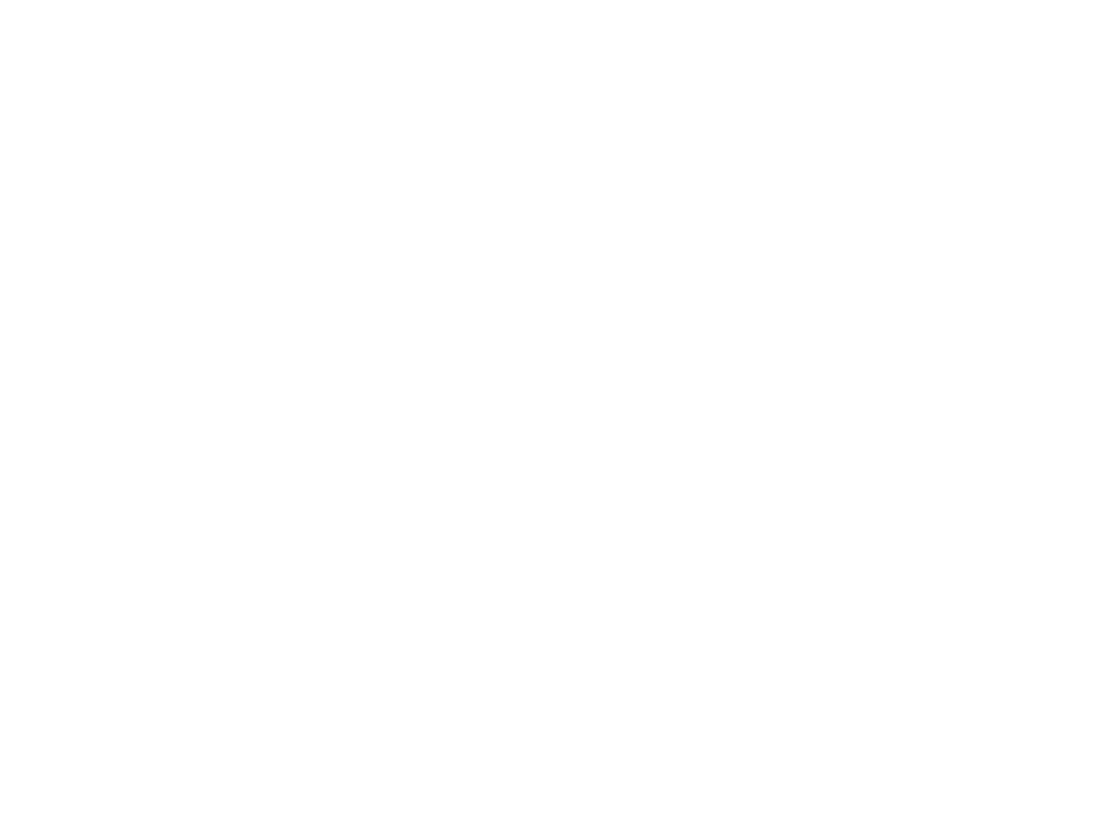

6


<IPython.core.display.Javascript object>


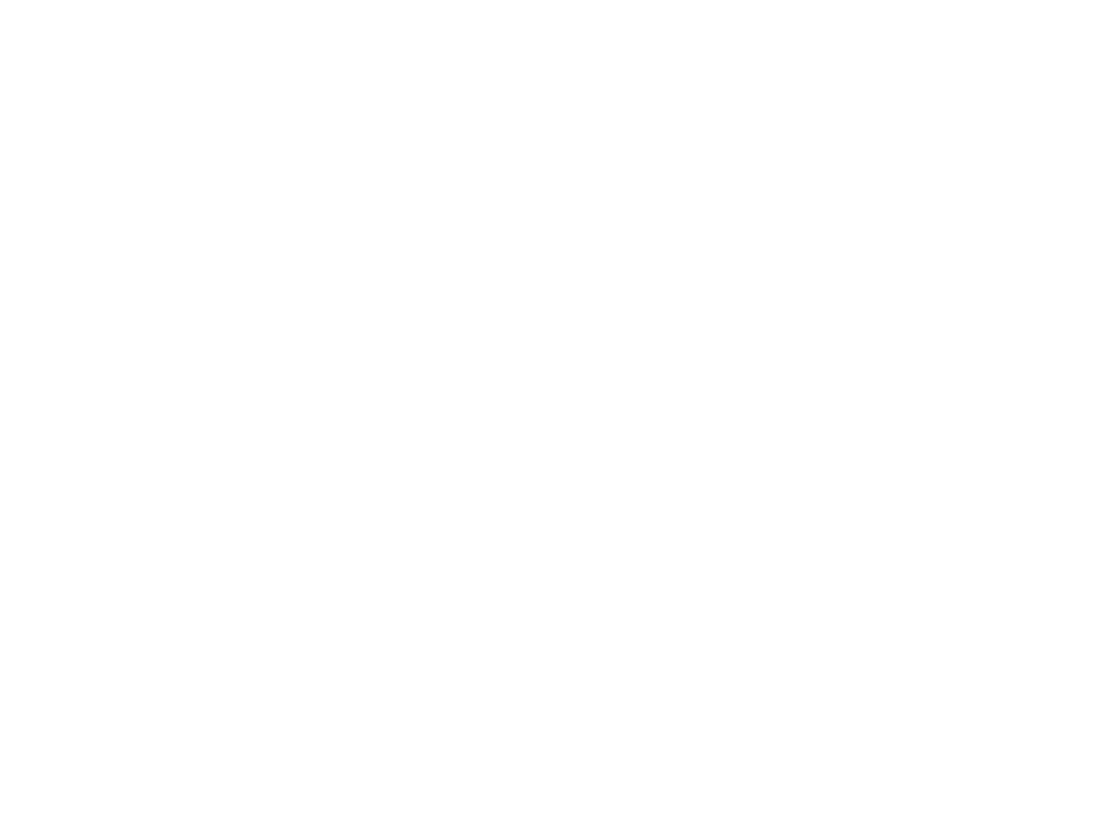

7


<IPython.core.display.Javascript object>


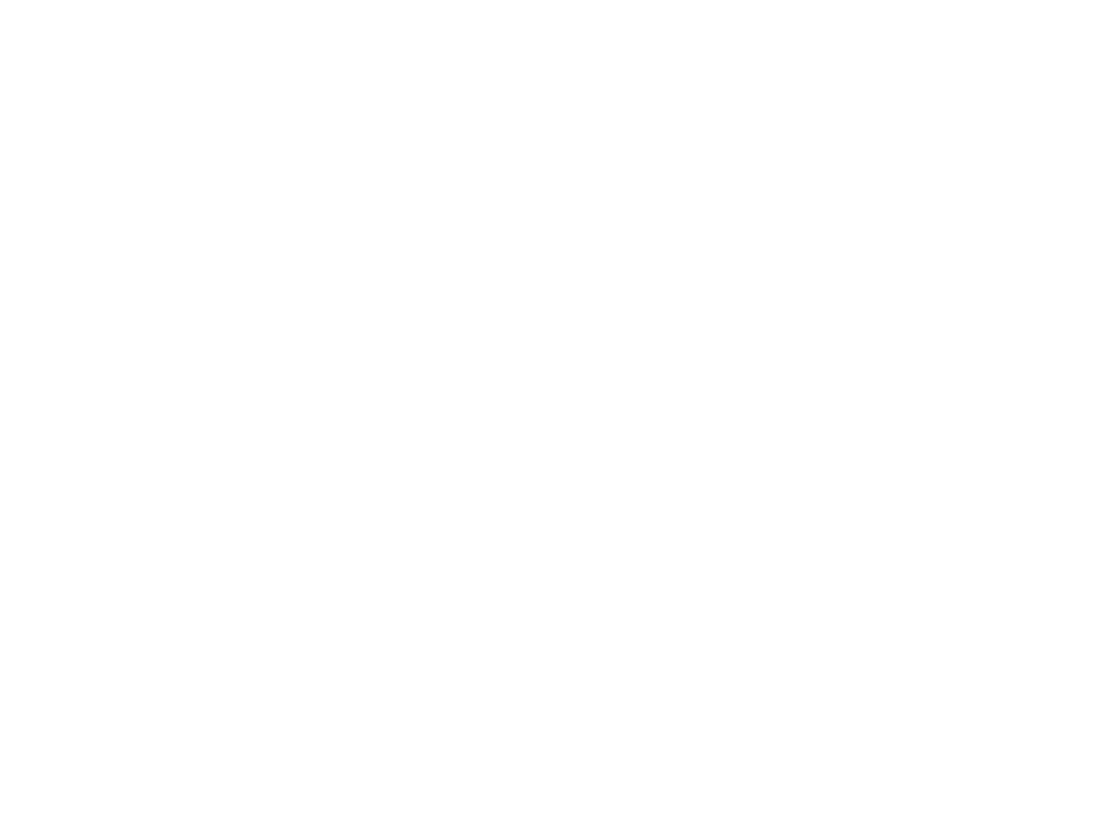

8


<IPython.core.display.Javascript object>


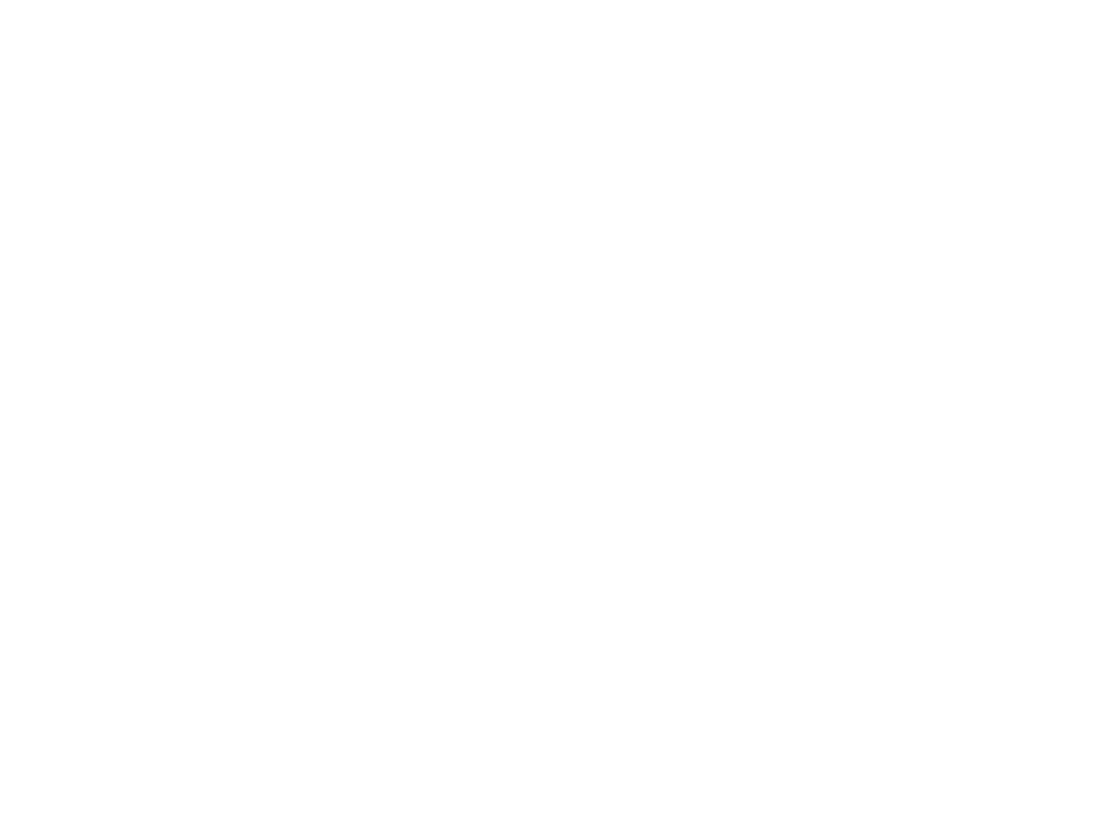

9


<IPython.core.display.Javascript object>


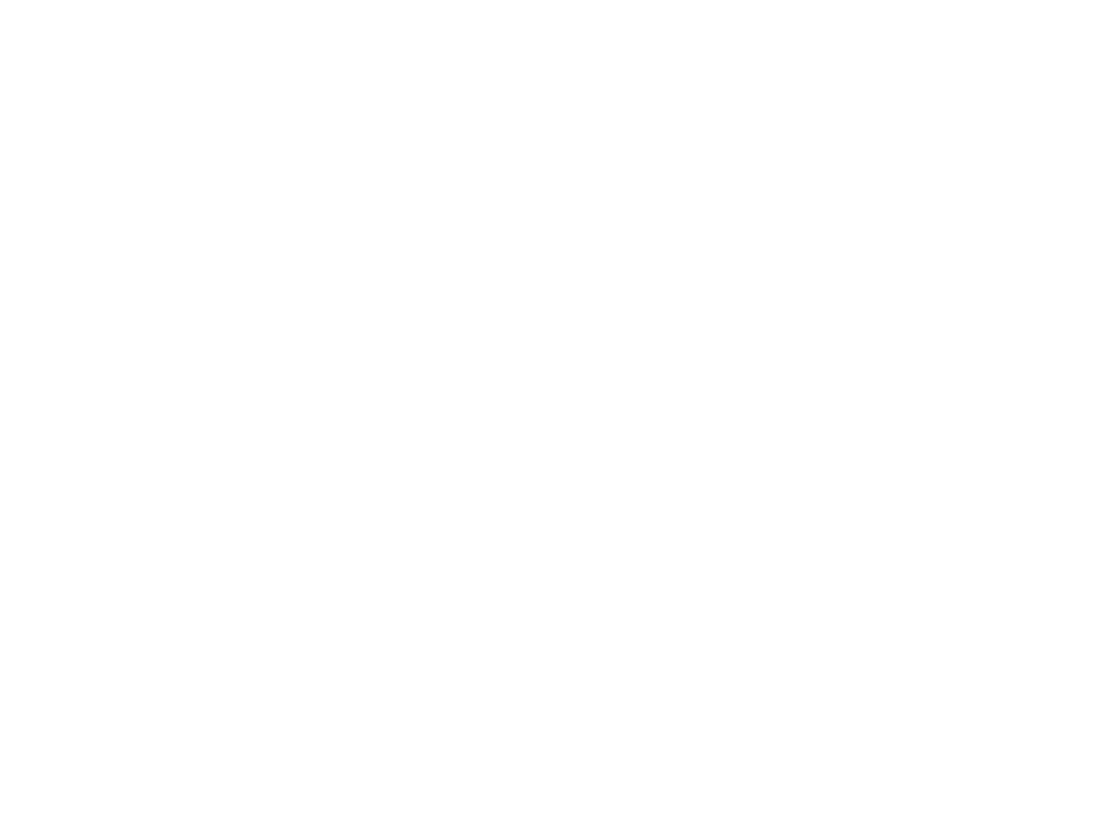

10


<IPython.core.display.Javascript object>


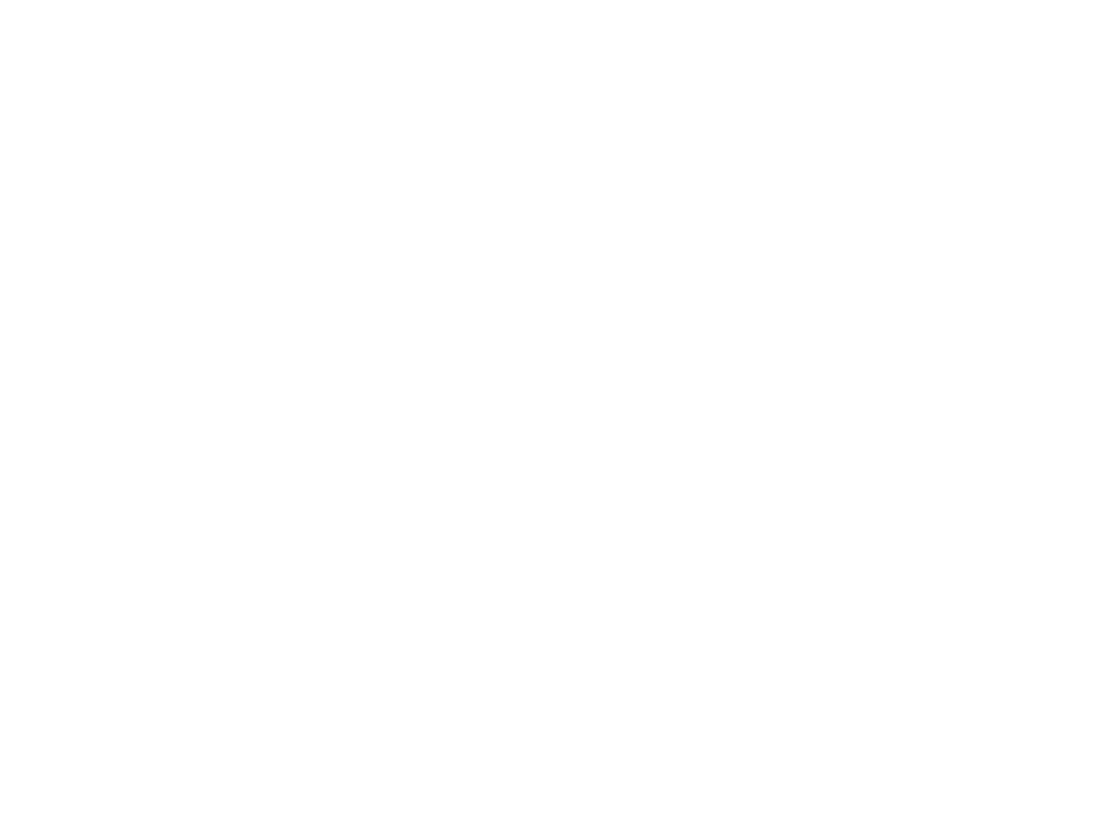

11


<IPython.core.display.Javascript object>


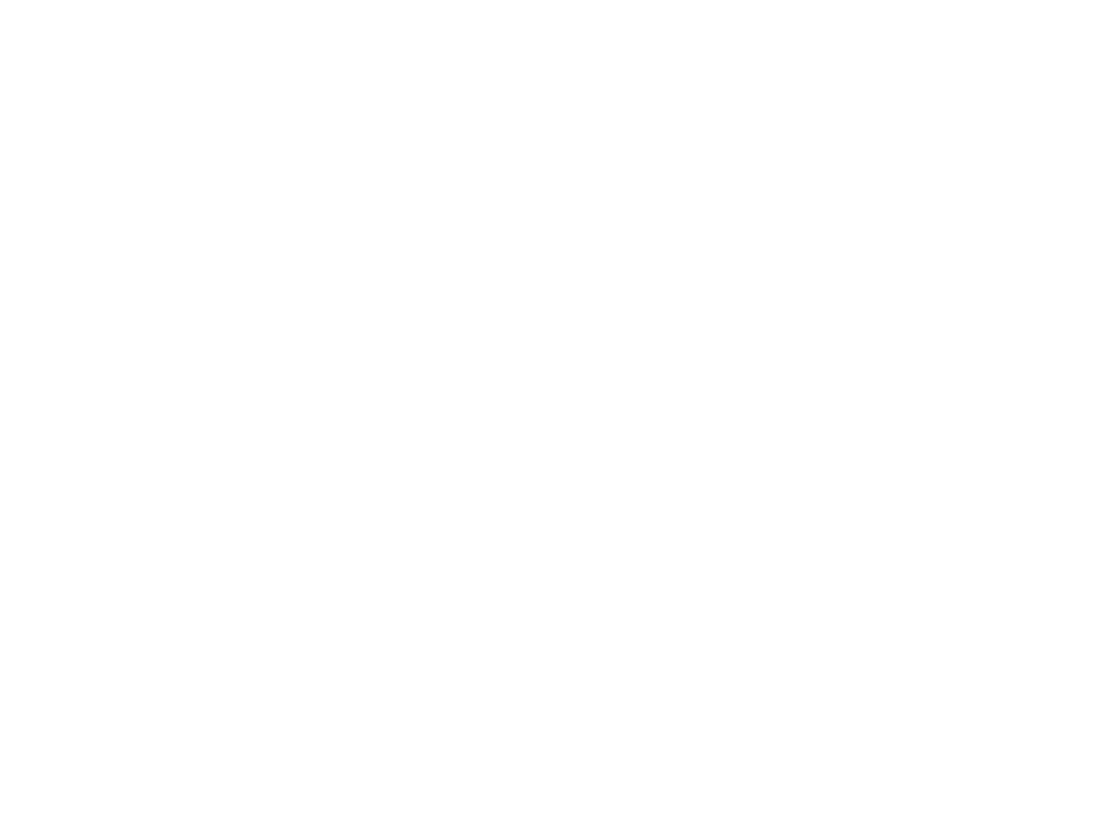

12


<IPython.core.display.Javascript object>


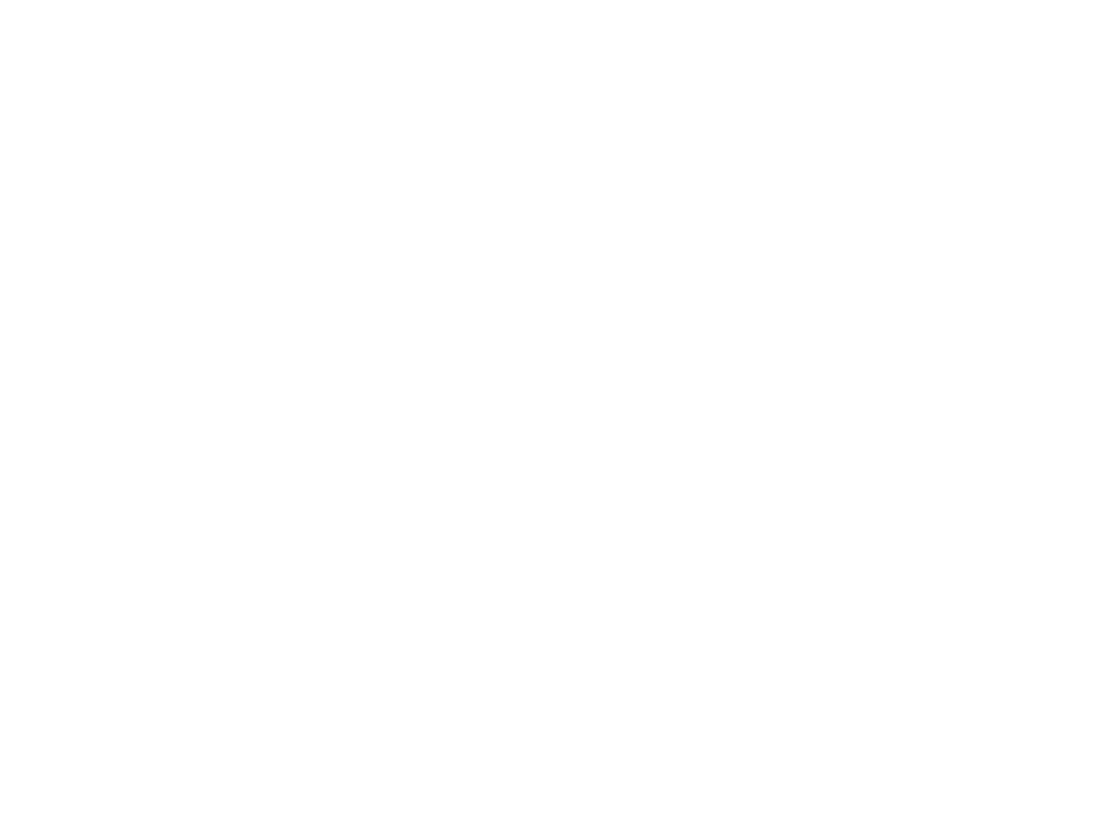

13


<IPython.core.display.Javascript object>


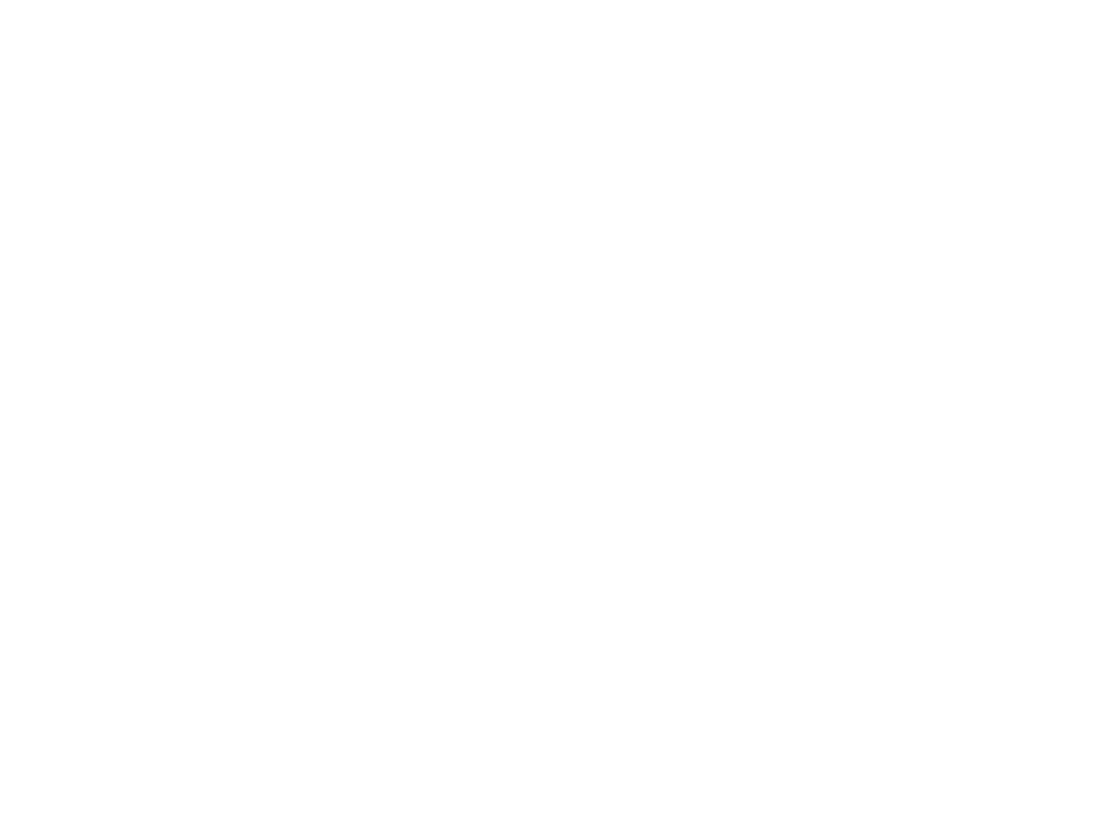

14


<IPython.core.display.Javascript object>


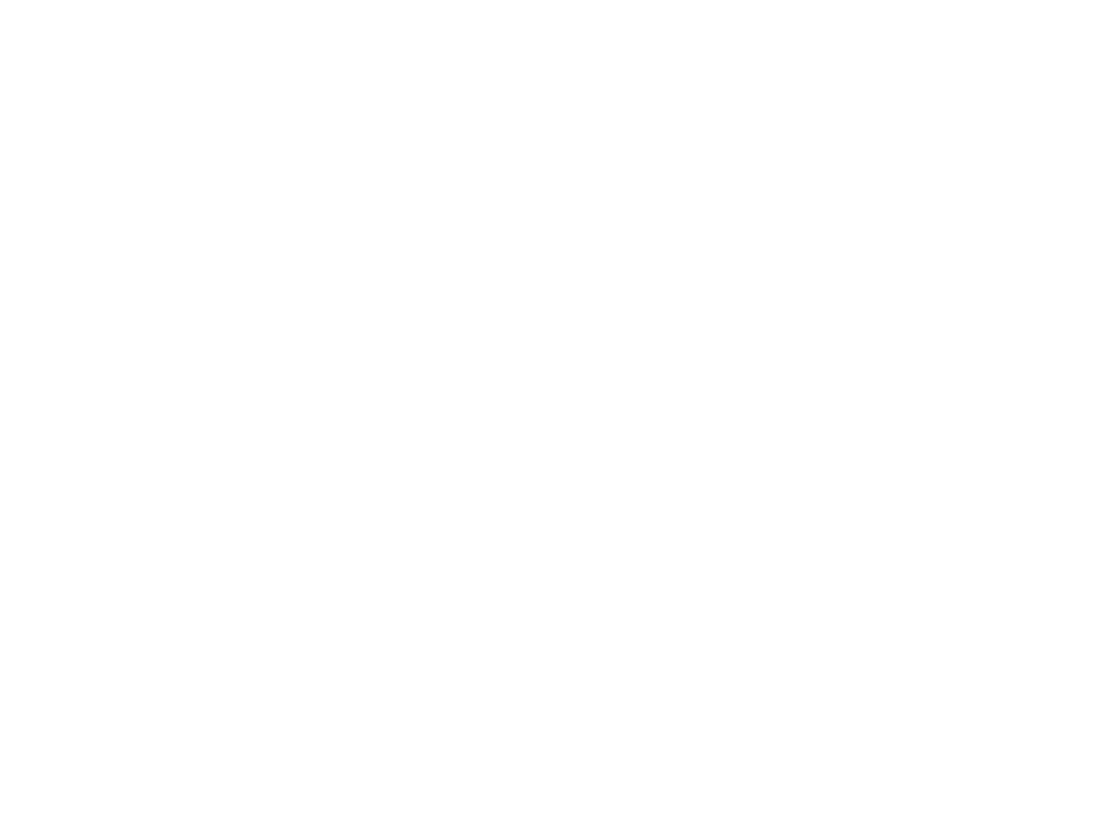

15


<IPython.core.display.Javascript object>


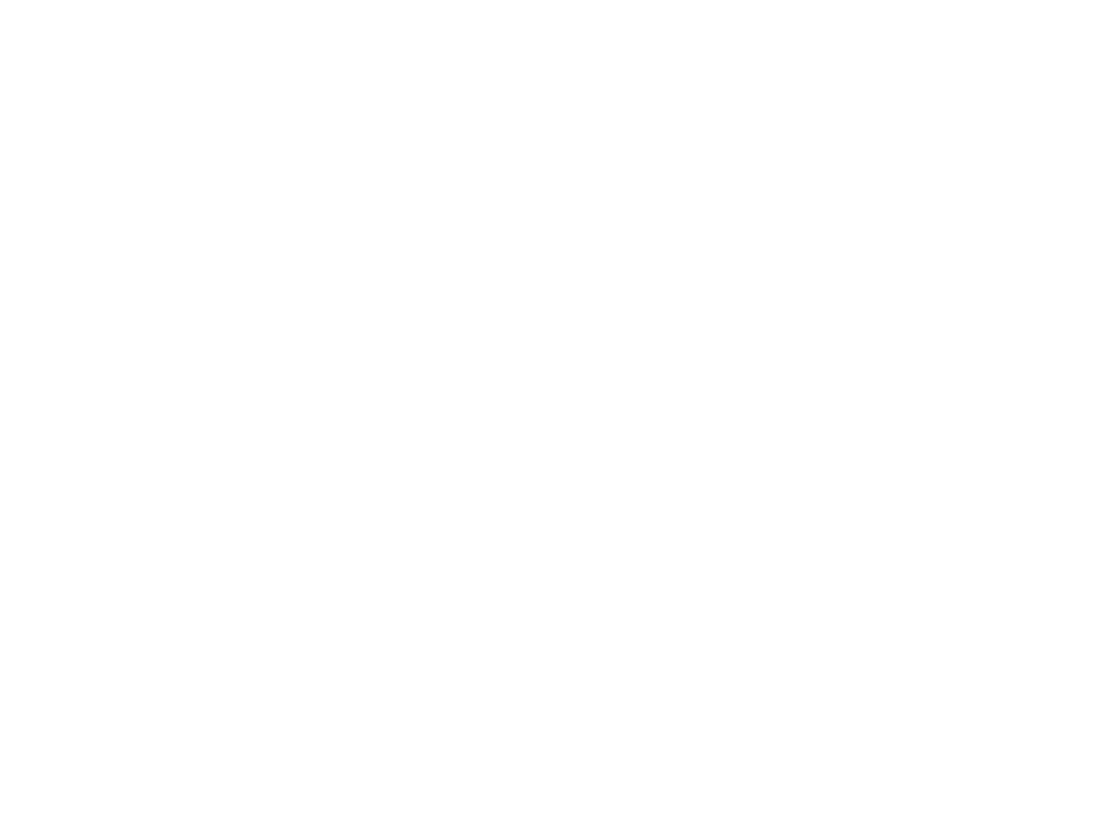

16


<IPython.core.display.Javascript object>


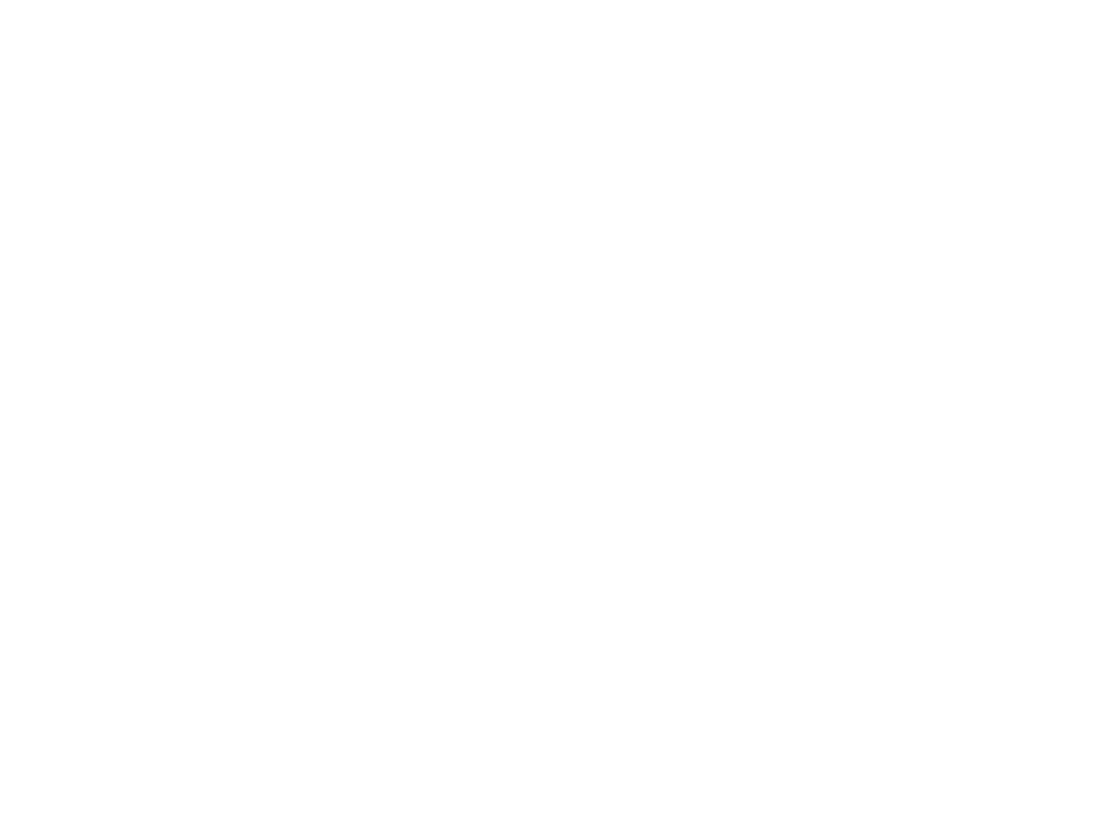

17


<IPython.core.display.Javascript object>


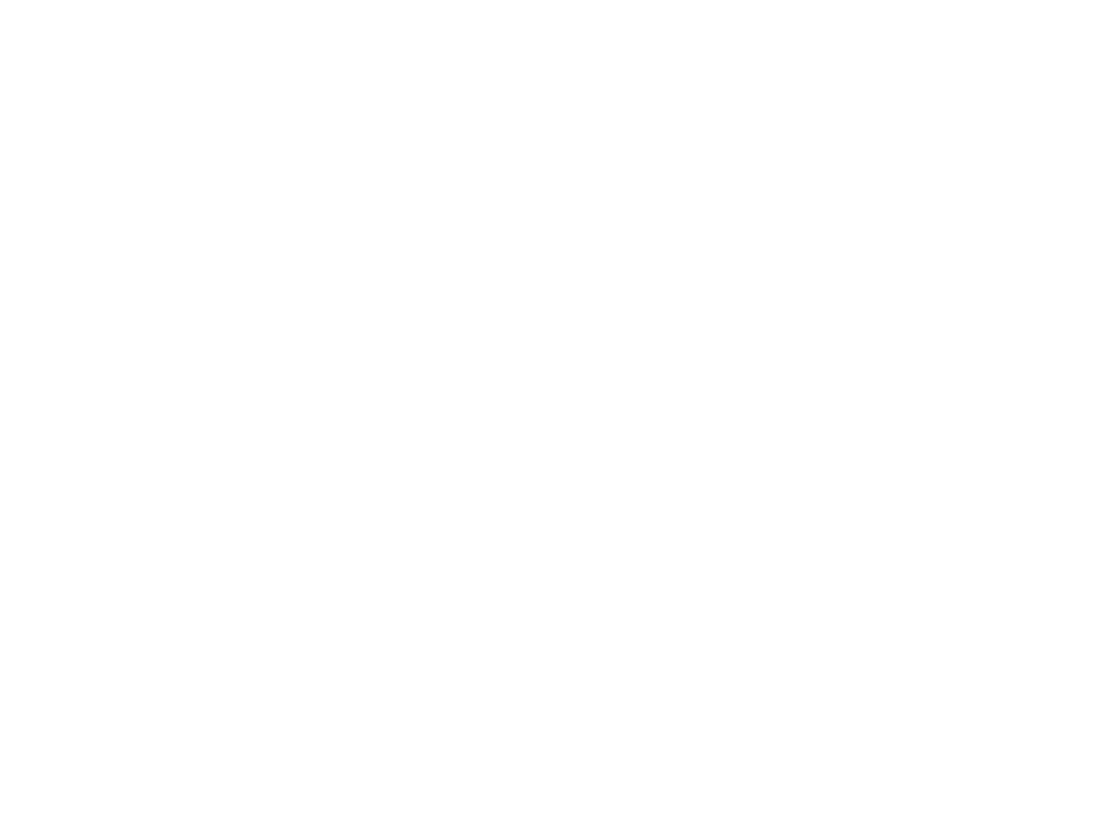

18


<IPython.core.display.Javascript object>


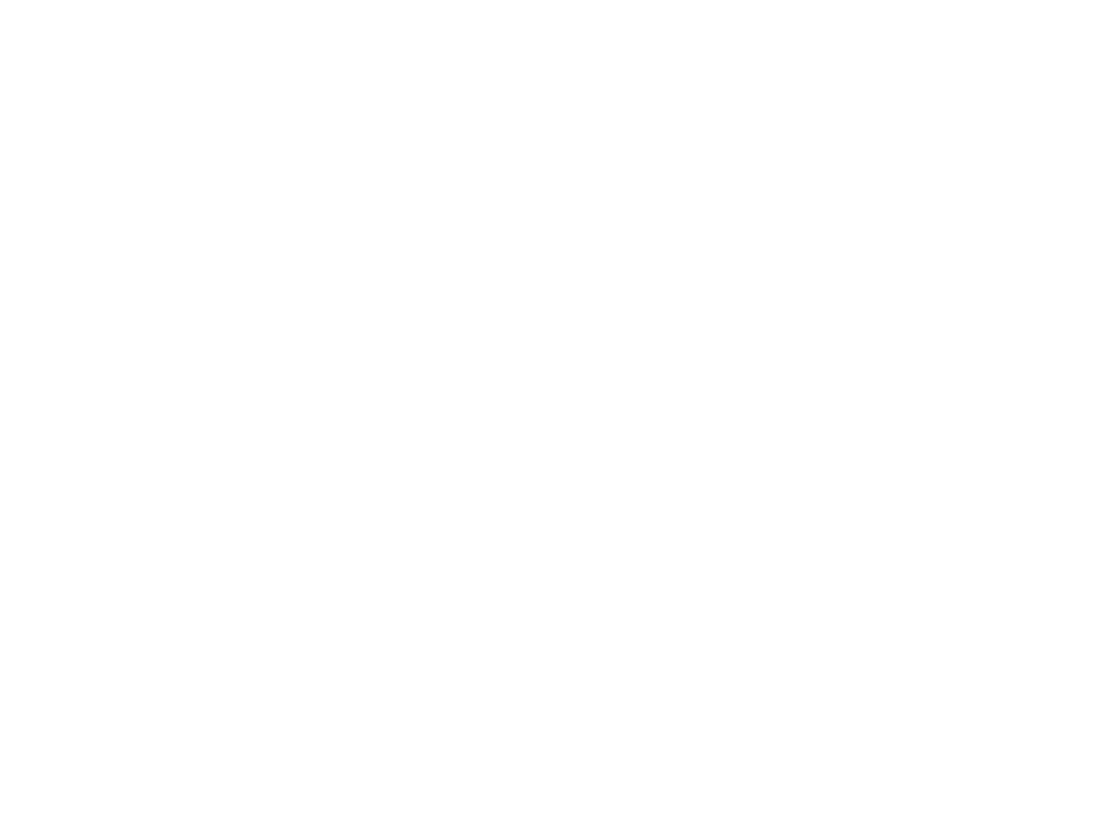

19


<IPython.core.display.Javascript object>


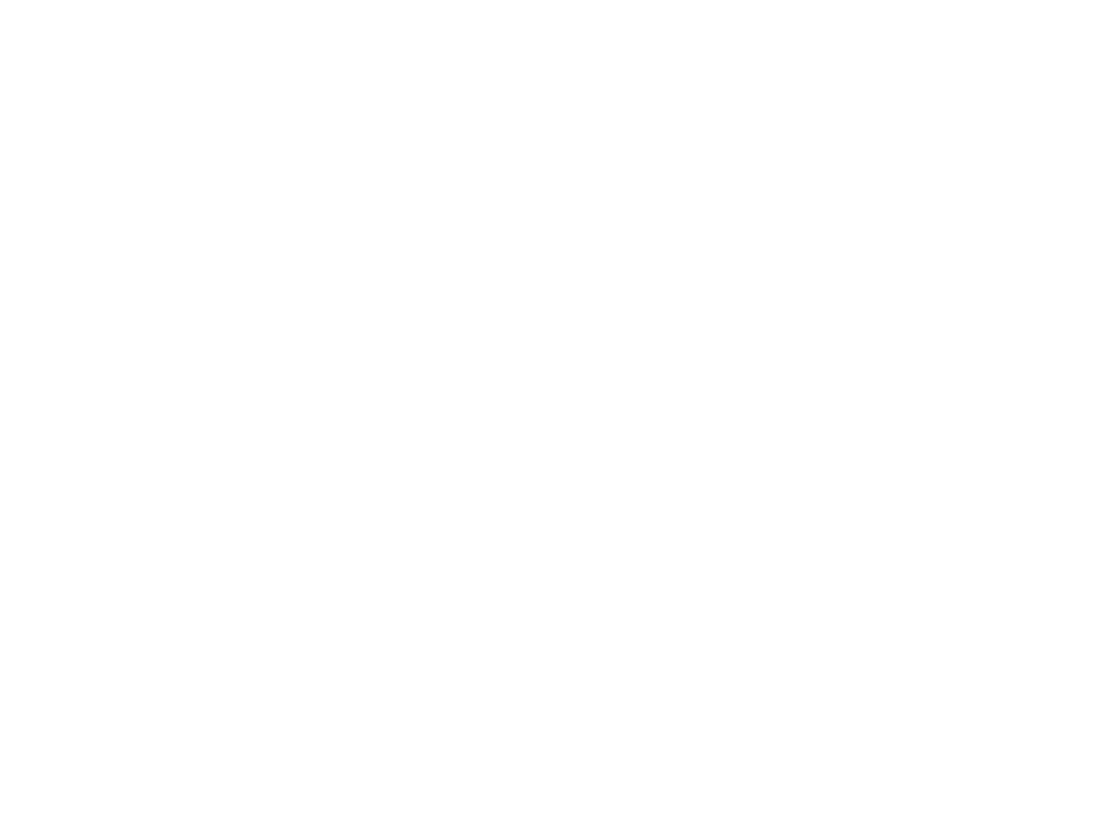

In [8]:
#plot the D_4 matrices, one for each i, where the last index is stacked, thus matrix n\times n^2

D4[abs(D4) < th_4]=0
for i in range(len(G)):
    print(i)
    plt.figure()
    plt.imshow(D4[i].reshape(len(G), len(G)**2),aspect='auto')#,vmin=-.5,vmax=0.5)
    plt.colorbar()
    plt.savefig('images/D4_'+str(i)+'.png')
    plt.close()

<IPython.core.display.Javascript object>


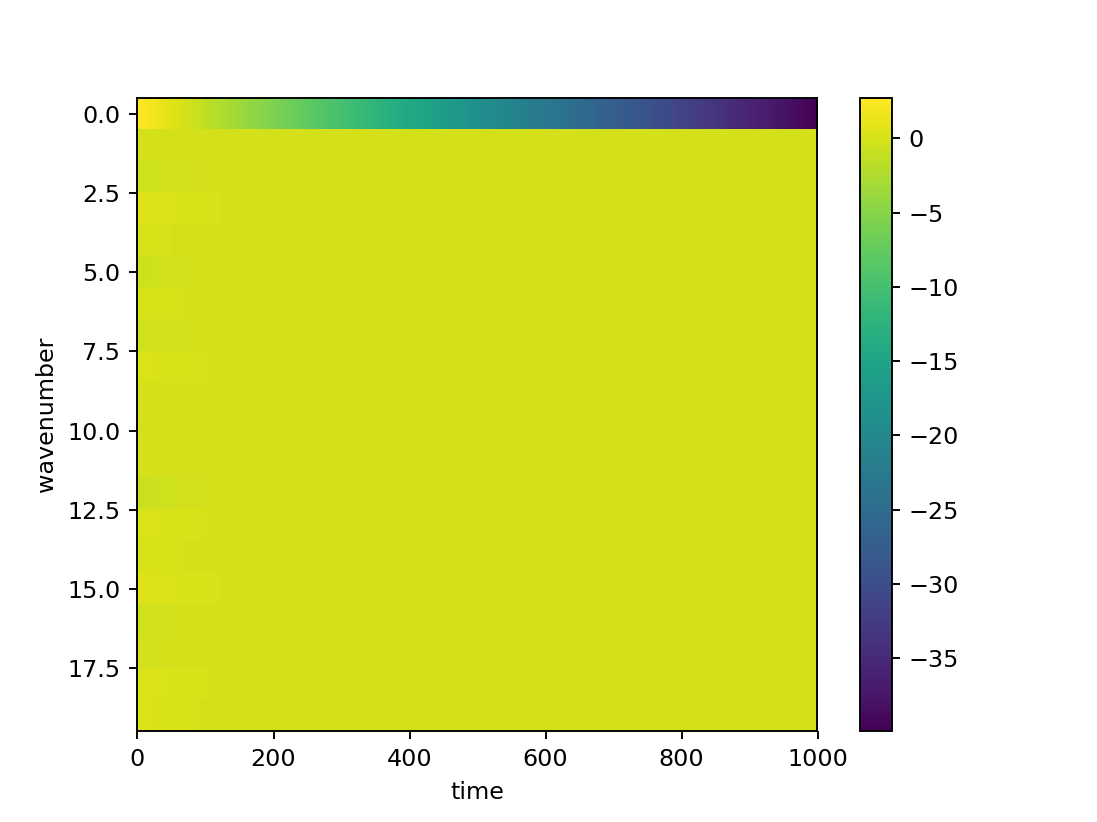

Text(0,0.5,'wavenumber')

In [9]:
#do an integration of full kuramoto

theta_0 = np.random.uniform(0, 1.5, len(G))
gamma_0 = theta_0.dot(v).copy()

alpha = 0.5
a = 1
omega_0 = np.zeros(len(G))
t_max = 20
n_t = 1000

sol_full = integrate_kuramoto_full_theta(B, Bplus, theta_0, t_max, n_t, alpha, a, omega_0)
sol_full.y = v.T.dot(sol_full.y)

plt.figure()
plt.imshow(sol_full.y,aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('wavenumber')

Using  171 elements of Delta_3
Using  20 elements of Delta_4


<IPython.core.display.Javascript object>


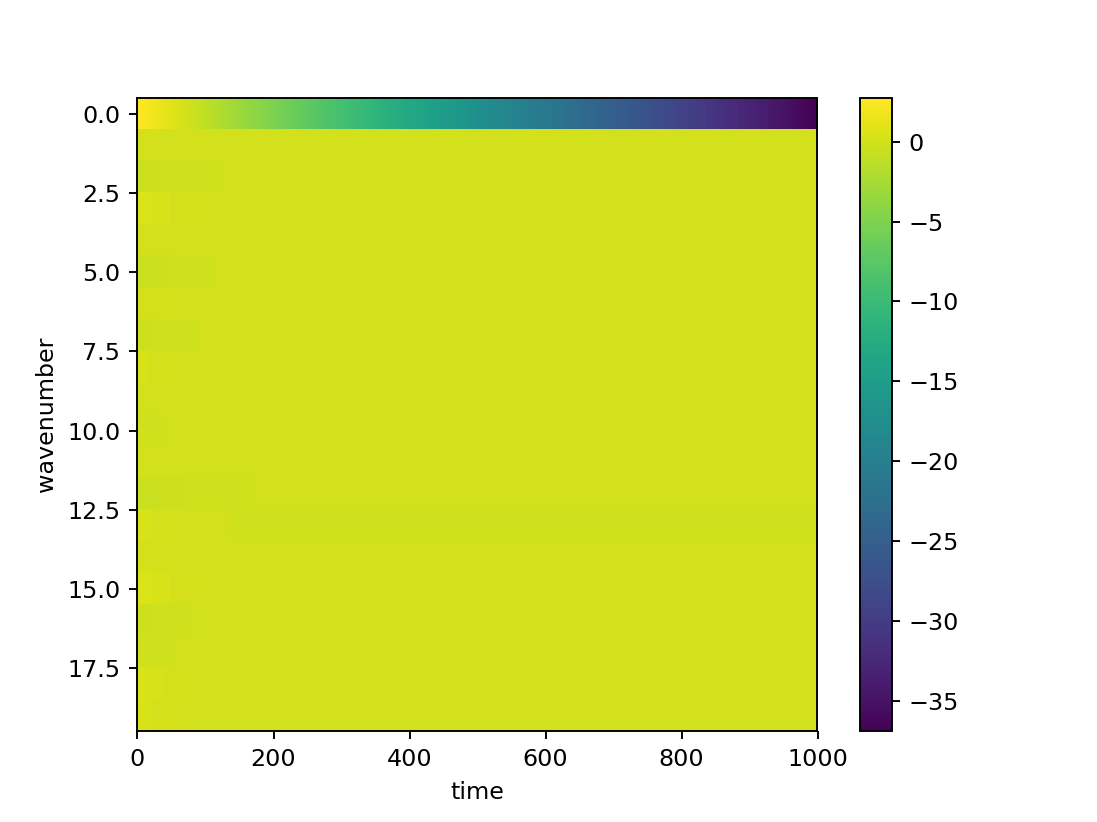

<IPython.core.display.Javascript object>


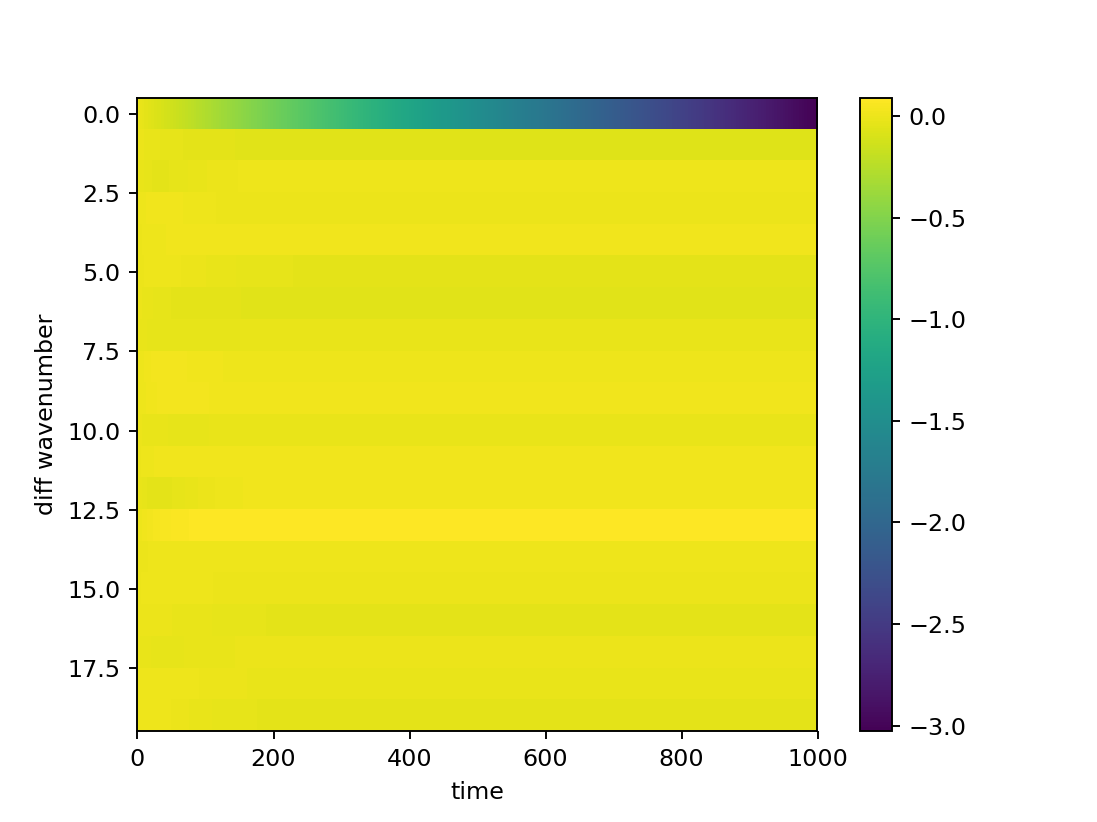

Text(0,0.5,'diff wavenumber')

In [10]:
#do integration of approximated Kuramoto

sol_approx = integrate_kuramoto_approx(B, Bplus, v, w, gamma_0, t_max, n_t, alpha, a, omega_0, th_3, th_4)[0]

plt.figure()
plt.imshow(sol_approx.y,aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('wavenumber')

plt.figure()
plt.imshow(sol_full.y-sol_approx.y, aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('diff wavenumber')

<IPython.core.display.Javascript object>


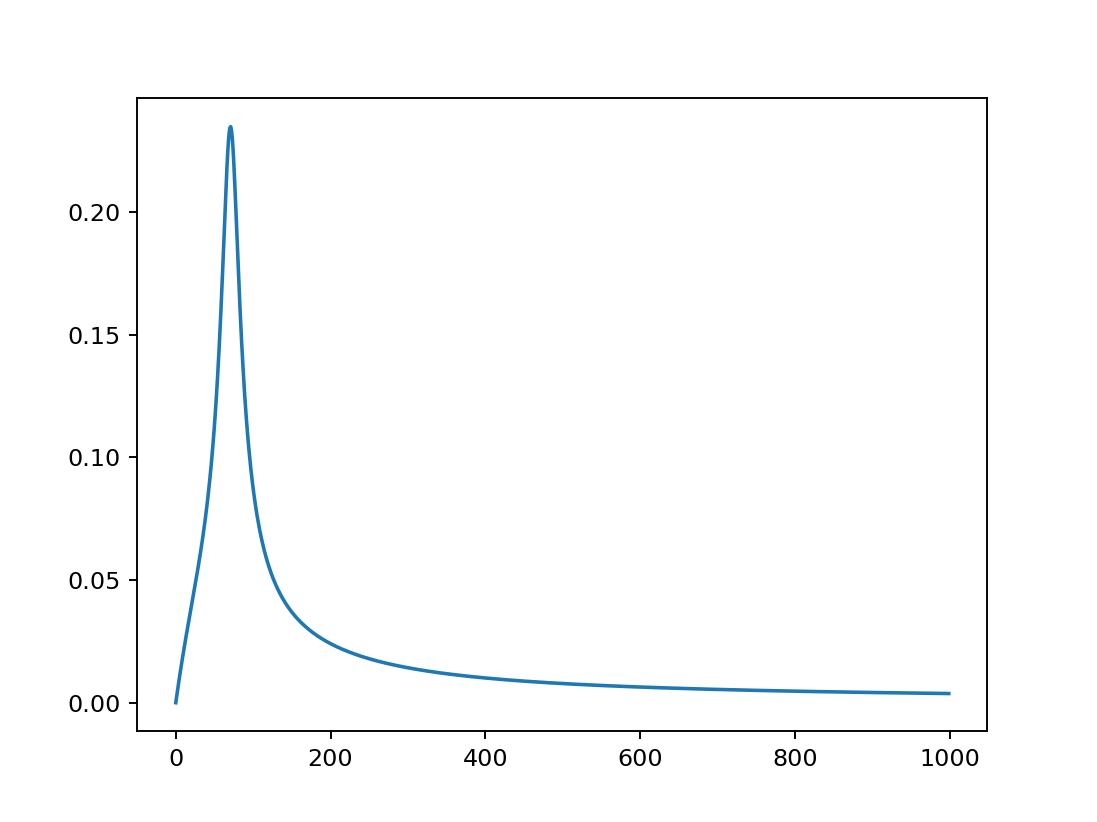

In [11]:

err = compute_error(sol_full, sol_approx)
plt.figure()
plt.plot(err)

In [12]:
#scan the threhsold values and compute error

TH_3 = np.logspace(-1., 2., 10)
TH_4 = np.logspace(-1., 0.2, 10)

errs = np.zeros([len(TH_3),len(TH_4)])
L_4 = np.zeros([len(TH_4)])
L_3 = np.zeros([len(TH_3)])

for i, th_3 in enumerate(TH_3):
    for j, th_4 in enumerate(TH_4):
        
        print(th_3, th_4)
        sol_approx, l_3, l_4 = integrate_kuramoto_approx(B, Bplus, v, w, gamma_0, t_max, n_t, alpha, a, omega_0, th_3, th_4)
        
        L_4[j] = l_4
        L_3[i] = l_3

        errs[i,j] = np.max(compute_error(sol_full, sol_approx))

0.1 0.1
Using  605 elements of Delta_3
Using  504 elements of Delta_4
0.1 0.13593563908785256
Using  605 elements of Delta_3
Using  235 elements of Delta_4
0.1 0.18478497974222907
Using  605 elements of Delta_3
Using  98 elements of Delta_4
0.1 0.251188643150958
Using  605 elements of Delta_3
Using  58 elements of Delta_4
0.1 0.34145488738336016
Using  605 elements of Delta_3
Using  36 elements of Delta_4
0.1 0.46415888336127786
Using  605 elements of Delta_3
Using  20 elements of Delta_4
0.1 0.6309573444801934
Using  605 elements of Delta_3
Using  11 elements of Delta_4
0.1 0.8576958985908941
Using  605 elements of Delta_3
Using  2 elements of Delta_4
0.1 1.1659144011798317
Using  605 elements of Delta_3
Using  2 elements of Delta_4
0.1 1.5848931924611136
Using  605 elements of Delta_3
Using  0 elements of Delta_4
0.21544346900318834 0.1
Using  315 elements of Delta_3
Using  504 elements of Delta_4
0.21544346900318834 0.13593563908785256
Using  315 elements of Delta_3
Using  235 eleme

Using  0 elements of Delta_3
Using  0 elements of Delta_4
100.0 0.1
Using  0 elements of Delta_3
Using  504 elements of Delta_4
100.0 0.13593563908785256
Using  0 elements of Delta_3
Using  235 elements of Delta_4
100.0 0.18478497974222907
Using  0 elements of Delta_3
Using  98 elements of Delta_4
100.0 0.251188643150958
Using  0 elements of Delta_3
Using  58 elements of Delta_4
100.0 0.34145488738336016
Using  0 elements of Delta_3
Using  36 elements of Delta_4
100.0 0.46415888336127786
Using  0 elements of Delta_3
Using  20 elements of Delta_4
100.0 0.6309573444801934
Using  0 elements of Delta_3
Using  11 elements of Delta_4
100.0 0.8576958985908941
Using  0 elements of Delta_3
Using  2 elements of Delta_4
100.0 1.1659144011798317
Using  0 elements of Delta_3
Using  2 elements of Delta_4
100.0 1.5848931924611136
Using  0 elements of Delta_3
Using  0 elements of Delta_4


<IPython.core.display.Javascript object>


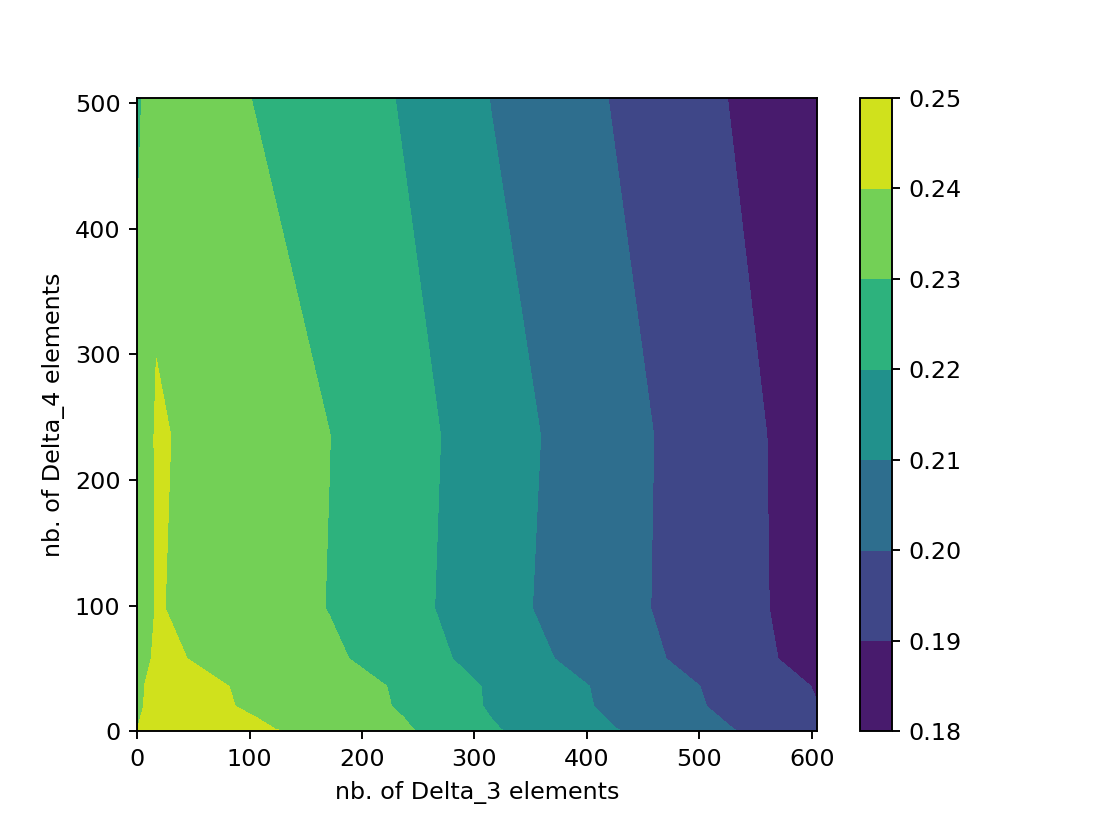

<IPython.core.display.Javascript object>


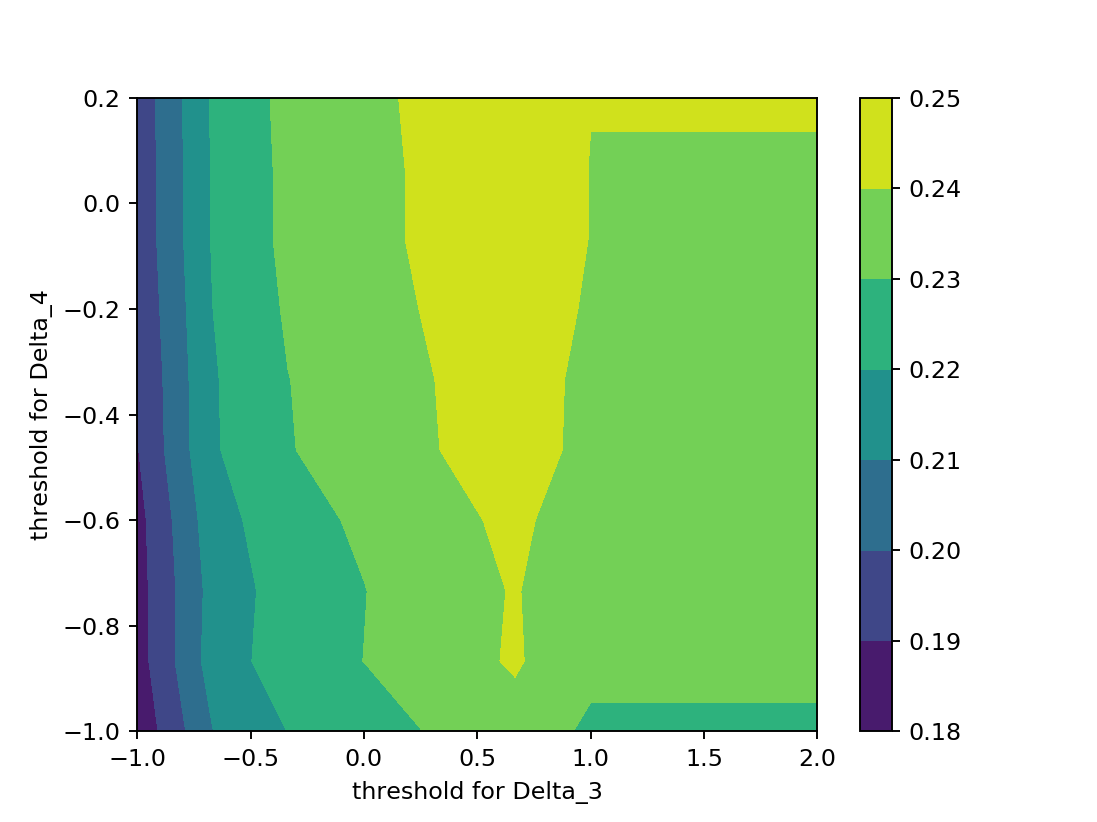

Text(0,0.5,'threshold for Delta_4')

In [13]:
#plot error as a function of number of elements
X, Y = np.meshgrid(L_3, L_4)

plt.figure()
plt.contourf(X,Y,errs.T)
plt.colorbar()
plt.xlabel('nb. of Delta_3 elements')
plt.ylabel('nb. of Delta_4 elements')

#plot error as a function of number of threshold

X, Y = np.meshgrid(np.log10(TH_3), np.log10(TH_4))
plt.figure()
plt.contourf(X,Y,errs.T)
plt.colorbar()

plt.xlabel('threshold for Delta_3')
plt.ylabel('threshold for Delta_4')
